# Credit default prediction: A comparison between machine learning models
<h3><center>Le Hoang Viet, VU Thanh Lan, Hongxia TANG - M2 FTD</center></h3>

## Structure

### 1. Introduction 
### 2. Importing library
### 3. Importing dataset
   ####  3.1. Data description
   ####  3.2. Data exploration
### 4. Predictive models
   #### 4.1. Logistic regression
   #### 4.2. SVM
   #### 4.3. Random forest
   #### 4.4. Gradient boosting
   #### 4.5. Adaboost    
   #### 4.6. XGBoost
   #### 4.7. CATBoost
   #### 4.8. LightGBM
### 5. Result summary
### 6. Conclusion
### Reference





# 1. Introduction

The credit score is a numeric expression measuring people’s creditworthiness. It is vital for the banking system to utilize credit score as a method to support the decision-making about credit applications. Therefore the credit score is developed and applied for this purpose because it is time-saving and easily comprehensible.
There are a certain number of studies in creating a scoring model with the use of machine learning. In this paper, we are going to build and compare the performance of several machine learning models in predicting the default of credit card clients. 

The models that are used in our study include the traditional statistical model of logistic regression, the classical machine learning classifiers such as Support Vector Classifier, Random Forest and Boosting (Gradient and Ada Boosting) as parts of the popular machine learning package (scikit-learn). Moreover, we also add the new boosting decision tree based models of XGBoost, CATBoost and LightBGM, which are proven to be quite effective and popular in Kaggle's competition recently. 

As we are studying about probability of default, the imbalanced of data is an usual problems. In this study, for each type of model, 2 methods of oversampling are applied which are the utilization of class weights and SMOTE. Furthermore, in order to ensure the stability of the models, cross-validation is also used to compare the results.

## 1.1. Dataset
Based on the paper of I-Cheng Yeh and Che-hui Lien: "The comparisons of data mining techniques for the predictive accuracy of probability of default of credit card clients". 

Our dataset contains 6 months information of default payments, demographic factors, credit data, history of payment, and bill statement of credit card clients in Taiwan from April 2005 to September 2005. Among the total 30000 observations, 6636 observations are the cardholders with default payment. 

Our project employed a binary variable - default payment(yes=1,no=0), as the response variable. And we used following **23 variables as explanatory variables**:
- **LIMIT_BAL**: Amount of the given credit(NT dollar): it includes both the individual consumer credit and his/her family(supplementary) credit.
- **SEX**: 1 = male; 2 = female.
- **EDUCATION**: 1 = graduate school; 2 = university; 3 = high school; 4= others.
- **MARRIAGE**: Martial status(1 = married; 2 = single; 3 = others).
- **AGE**: year 
- **PAY_0**: Repayment status in September, 2005, (-1=pay duly; 1=payment delay for one month; 2=payment for two months;...;8=payment delay for 8 months; 9 =payment delay for nine months and above).
- **PAY_2**: Repayment status in August, 2005, (same scale as PAY_0).
- **PAY_3**: Repayment status in July, 2005, (same scale as PAY_0).
- **PAY_4**: Repayment status in June, 2005, (same scale as PAY_0).
- **PAY_5**: Repayment status in May, 2005, (same scale as PAY_0).
- **PAY_6**: Repayment status in April, 2005, (same scale as PAY_0).
- **BILL_AMT1**: Amount of bill statement in September,2005. (NT dollar)
- **BILL_AMT2**: Amount of bill statement in August,2005. (NT dollar)
- **BILL_AMT3**: Amount of bill statement in July,2005. (NT dollar)
- **BILL_AMT4**: Amount of bill statement in June,2005. (NT dollar)
- **BILL_AMT5**: Amount of bill statement in May,2005. (NT dollar)
- **BILL_AMT6**: Amount of bill statement in April,2005. (NT dollar)
- **PAY_AMT1**: Amount paid in September,2005.(NT dollar)
- **PAY_AMT2**: Amount paid in August,2005.(NT dollar)
- **PAY_AMT3**: Amount paid in July,2005.(NT dollar)
- **PAY_AMT4**: Amount paid in June,2005.(NT dollar)
- **PAY_AMT5**: Amount paid in May,2005.(NT dollar)
- **PAY_AMT6**: Amount paid in April,2005.(NT dollar)

# 2. Importing library

In [46]:
import os
import pandas as pd
import numpy as np
import statsmodels.tsa.stattools
import matplotlib.pyplot as plt
from datetime import datetime,timedelta
import seaborn as sns

from sklearn.metrics import plot_confusion_matrix
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier,plot_importance
from catboost import CatBoostClassifier
from  lightgbm import LGBMClassifier

from sklearn.utils.class_weight import compute_sample_weight,compute_class_weight
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline, make_pipeline

from sklearn.model_selection import cross_val_score,cross_validate,train_test_split, KFold


from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,cohen_kappa_score,roc_auc_score,confusion_matrix,auc
from sklearn.datasets import make_circles


# 3. Importing dataset
Reading data from csv file

In [2]:
# data=pd.read_csv('default-of-credit-card-clients.csv',index_col='ID')

Reading data from url

In [3]:
data=pd.read_excel('http://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls',skiprows=1,index_col='ID')

Splitting data in to label and explanatory variable

In [4]:
x=data.iloc[:,:-1]
Y=data.iloc[:,-1]

## 3.1. Data Description

In [5]:
data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [6]:
data.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


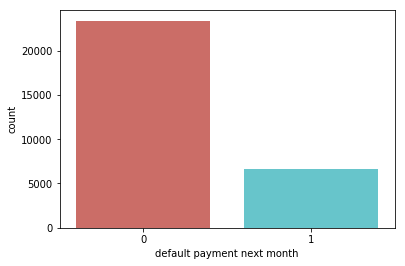

count    30000.000000
mean         0.221200
std          0.415062
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: default payment next month, dtype: float64

In [7]:
Y.value_counts()
sns.countplot(Y,palette="hls")
plt.show()
Y.describe()

**Comments**: Based on ourresults above, the average value for the amount of credit card limit is 167484, and the standard deviation of this is unusually large, which is 129747.

The mean of Sex is 1.6, there are more data of women in our dataset.

Education level, most clients have graduate school or university level.

In our case, most clients are either married or single.

Average age of clients is 35.5 years. Clients' age is from 21 to 79 years.

Default payment value is 0.221, means that there are 22.1% of credit card contracts that will default next month.

The data is imbalanced as there are only 22.1% are label as default.

## 3.2. Data exploration

### 3.2.1. Amount of the given credit
**Here we want to explore the relationship between the amount of given credit and age and credit default.**

/home/ec2-user/anaconda3/envs/amazonei_tensorflow_p36/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/home/ec2-user/anaconda3/envs/amazonei_tensorflow_p36/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


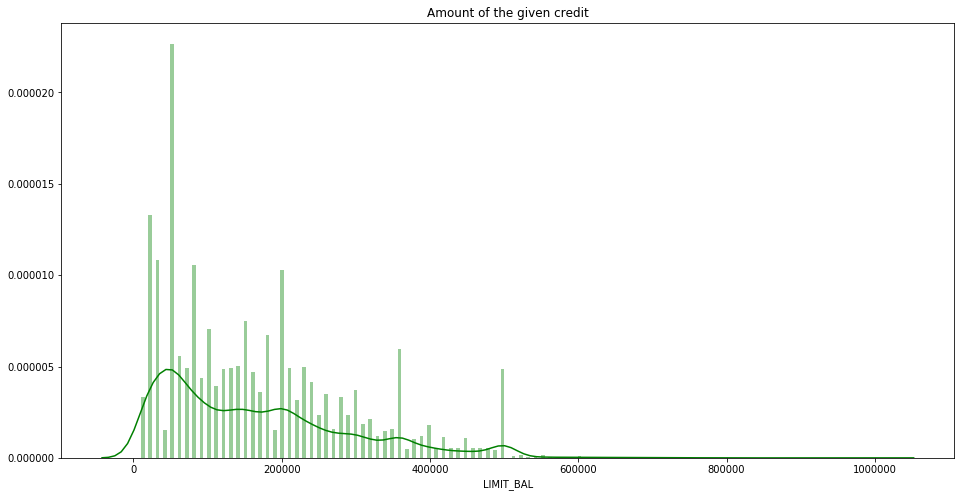

In [8]:
plt.figure(figsize=(16,8))
plt.title('Amount of the given credit')
sns.distplot(data['LIMIT_BAL'], bins=200, kde=True,color="green")
plt.show()

From the figure above, we can find the mode of credit limit is value around 50000.

In [9]:
data['LIMIT_BAL'].value_counts().head(5)

50000     3365
20000     1976
30000     1610
80000     1567
200000    1528
Name: LIMIT_BAL, dtype: int64

And now we found there are 3365 clients with a credit limit of 50000, then followed 1976 clients with a cresit limit of 20000.

Then we try to find if there is relationship between the credit limit and credit default.

/home/ec2-user/anaconda3/envs/amazonei_tensorflow_p36/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/home/ec2-user/anaconda3/envs/amazonei_tensorflow_p36/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


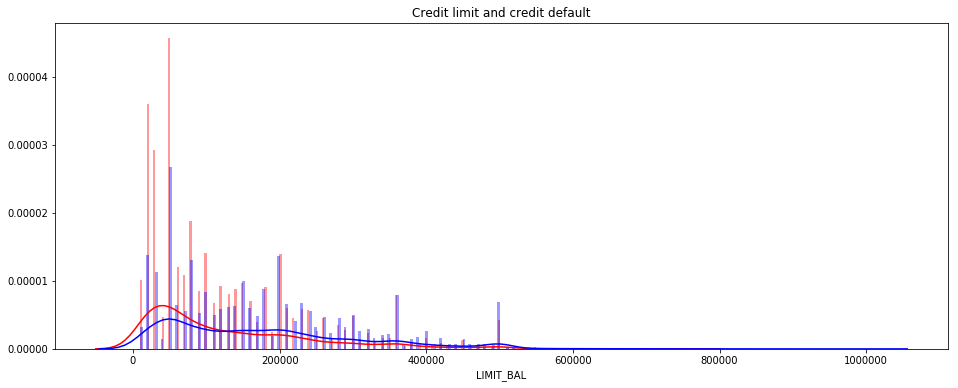

In [10]:
nondefault = data.loc[data['default payment next month'] == 0]["LIMIT_BAL"]
default = data.loc[data['default payment next month']==1]["LIMIT_BAL"]
plt.figure(figsize=(16,6))
plt.title('Credit limit and credit default')
sns.distplot(default,kde=True, bins=250,color="red")
sns.distplot(nondefault,kde=True,bins=250,color="blue")
plt.show()

From the figure above, we can find clients who default most, has a credit limit of 50000.

Then we want to explore the relationship between Credit limit and gender

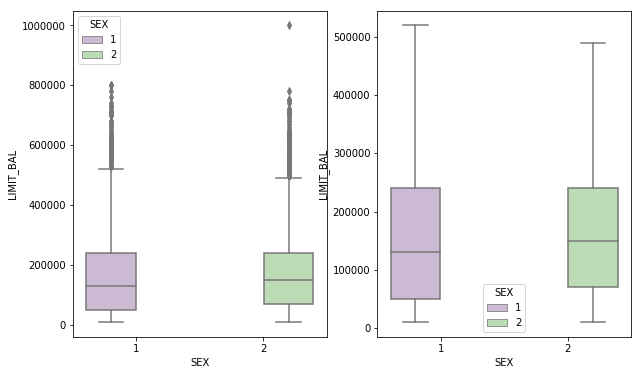

In [11]:
fig, (male, female) = plt.subplots(ncols=2, figsize=(10,6))
s = sns.boxplot(ax = male, x="SEX", y="LIMIT_BAL", hue="SEX",data=data, palette="PRGn",showfliers=True)
s = sns.boxplot(ax = female, x="SEX", y="LIMIT_BAL", hue="SEX",data=data, palette="PRGn",showfliers=False)
plt.show();

From the figure above, the limit credit amount is quite balanced between sex.

### 3.2.2. Correlations 
**Here we want to have a general view of correlations among variables.**

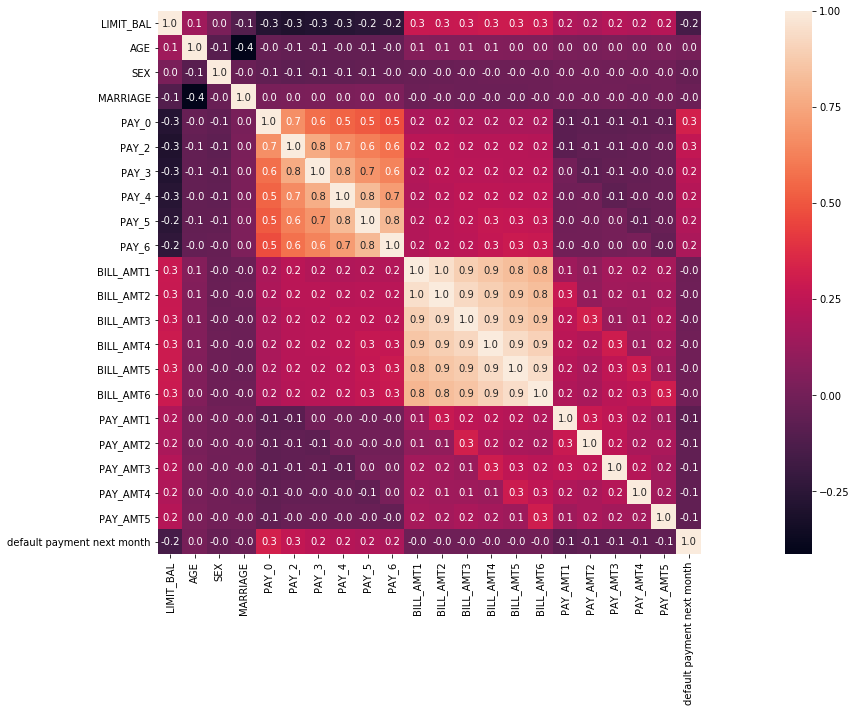

In [12]:
all=['LIMIT_BAL','AGE','SEX','MARRIAGE','PAY_0','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5','default payment next month'] 
correlationall = data[all].corr()
plt.subplots(figsize=(30,10))
sns.heatmap(correlationall,square=True, annot=True, fmt=".1f")
plt.show()

**Correlation among repayment status.**
From figure above, we can find the longer time distance we have, the smaller correlation we have, among repayment status. 

**Correlation among Amount of bill statement.**
Correlation decreasing with longer time periods. But we can find still strong correlation even if the time distance gets longer.

**Corrlation among Amount of previous payment.**
From the figure above, we can find that there is nearly no correlation between amounts of previous payments from april to september 2005. 

# 4. Predictive models
**Transforming categorical data into dummy variables**
There are several variables whose values are limited within a small number of categories.
We transform them into numerical form by the get_dummies method.
This help run the regression on those variables later.

In [13]:
x=pd.get_dummies(x,columns=['SEX','EDUCATION','MARRIAGE','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6'])

**Data Standardize**
As explanatory variables are measured in different scales and different units, we use the simply StandardScaler tool to normalize everythings before running a regression.

In [14]:
X = StandardScaler().fit_transform(x)
X = pd.DataFrame(X,columns=x.columns)

**Dealing with imbalanced data**
As description of the dataset, there are only 6,636 out of 30,000 samples is classified as default. This is commonly known as unbalance data, which will bias the prediction model towards the more dominate class. For example, in extreme cases where 1 out of 2 classes has samples size less than 5% total population, making the prediction of the model very accurate on that train-test dataset but have no predictive power over other datasets. Therefore,we must use balancing strategies for selecting random samples to avoid majority class bias. 
To deal with this problem, we apply 2 popular approaches, the class-weight method and SMOTE (Synthetic Minority Oversampling Technique).

Class-weight method directly modify the loss function by giving more (or less) penalty to the classes with more (or less) weight. We want to give higher weight to minority class and lower weight to majority class. scikit-learn has a convenient utility function to calculate the weights based on class frequencies

SMOTE on the other hand is a oversampling technique that allow us to up-sample the default data (minority with value of 1) to have a balanced dataset. To discribe how it works:
-	SMOTE works by creating synthetic samples from the minor class (no-subscription) instead of creating copies.
-	SMOTE randomly choosing one of the k-nearest-neighbors and using it to create a similar, but randomly tweaked, new observations

With each below algorithms, we include repeatedly the class-weight method and SMOTE to create a balance dataset using different classifier from those algorithms

## Models and performance measuremance
In this study, we select 8 classification algorithms out of the most popular techniques being applied that we want to try, includings:
- Logistic regression
- Random Forest
- Support Vector Machine
- Gradient Boosting
- AdaBoost
- XGBoost
- CATBoost
- LightBGM

These algorithms are non-linear classifiers as we assume the non-linear characteristic for credit scoring 
The 4-fold cross validation is also applied to effectively measure the skill of the our models on new data. We measure the precision and accuracy by averaging the 4 results.
Moreover, we apply both class weight and SMOTE method to deal with imbalanced data issue as mentioned above. This means for each classification algorithm, there will be 2 tests, one use class-weight and SMOTE is applied for the other.

To measure performance of each classification algorithms, we shows 6 ratios:
- **Fit_time**:

This is the time to run model (in seconds), showing the speed of calculation, depending on the volumne of data, numbers of variables and sophisication of the model.
We will consider also the trade-off between speed and performance for those methods
- **Accuracy**

It measures how many observations, both positive and negative, were correctly classified
$$Accuracy = \frac{tp+tn}{ tp+fp+tn+fn}$$
However, it's not ideal to use this ratio when the data is imbalanced. The prediction will be high accurate by simply classifying all observations as the majority class.

- **Precision and recall**

In contrast, Precision-Recall is a useful measure of success of prediction when the classes are very imbalanced. In information retrieval, precision is a measure of result relevancy, while recall is a measure of how many truly relevant results are returned. High precision relates to a low false positive rate, and high recall relates to a low false negative rate.
$$Precision = \frac{tp}{tp+fp}$$
$$Recall = \frac{tp}{tp+fn}$$

- **F1 score**

The F1 score combines precision and recall into one metric by calculating the harmonic mean between those two. For the F1 score, a threshold should be find to maximize the score.
$$F_1 = \frac{2\times Precision\times Recall}{Precision + Recall} = \frac{2tp}{2tp +fp+fn}$$

Binary classification such as in this case should apply the F1 score

- **ROC_AUC**

The ROC curve visualizes the tradeoff between true positive rate (TPR) and false positive rate (FPR), ROC AUC ratio means the area under the curve, ranging from 0 to 1. This ratio is more useful because it tells us that this metric shows how good at ranking predictions your model is. It tells you what is the probability that a randomly chosen positive instance is ranked higher than a randomly chosen negative instance.

## 4.1. Logistic Regression
### 4.1.1. Handling imbalance with class weight


In [15]:
classifier=LogisticRegression(class_weight="balanced")
kf = KFold(n_splits=4, random_state=0, shuffle=True)
scoresLR = cross_validate( classifier, X, Y, cv=kf,scoring=('accuracy','precision','recall','f1','roc_auc'),n_jobs=-1)

results=pd.DataFrame.from_dict(scoresLR).drop(['score_time'],axis=1).transpose()
results.columns=['Fold 1','Fold 2','Fold 3','Fold 4']
results['Average']=results.mean(axis=1)
log=results['Average']
display(results)

,Fold 1,Fold 2,Fold 3,Fold 4,Average
fit_time,0.507491,0.609507,0.593496,0.591495,0.575497
test_accuracy,0.777067,0.778800,0.767600,0.778800,0.775567
test_precision,0.489701,0.494007,0.480422,0.511518,0.493912
test_recall,0.582721,0.579462,0.574775,0.573693,0.577663
test_f1,0.532177,0.533333,0.523380,0.540825,0.532429
test_roc_auc,0.772498,0.771015,0.756414,0.773659,0.768397


### 4.1.2. Handling imbalance with SMOTE

In [16]:
classifier=LogisticRegression()
kf = KFold(n_splits=4, random_state=0, shuffle=True)
imba_pipeline = make_pipeline(SMOTE(random_state=0), 
                              classifier)
scoresLR = cross_validate(  imba_pipeline, X, Y, cv=kf,scoring=('accuracy','precision','recall','f1','roc_auc'),n_jobs=-1)
results=pd.DataFrame.from_dict(scoresLR).drop(['score_time'],axis=1).transpose()
results.columns=['Fold 1','Fold 2','Fold 3','Fold 4']
results['Average']=results.mean(axis=1)
log_smote=results['Average']
display(results)


,Fold 1,Fold 2,Fold 3,Fold 4,Average
fit_time,4.608674,4.569862,4.559555,4.506982,4.561268
test_accuracy,0.768133,0.773867,0.762933,0.774667,0.769900
test_precision,0.473632,0.484879,0.472452,0.503284,0.483562
test_recall,0.588848,0.588020,0.581982,0.584850,0.585925
test_f1,0.524993,0.531492,0.521529,0.541010,0.529756
test_roc_auc,0.771113,0.769356,0.757450,0.773063,0.767745


For logistic regression, we can find from two tables above, there is no big difference between class weight results and Smote results.  

## 4.2. Support Vector Classification (SVC)
### 4.2.1. Handling imbalance with class weight

In [17]:
from sklearn.svm import SVC
classifier=SVC(class_weight="balanced",random_state=0)
 
kf = KFold(n_splits=4, random_state=0, shuffle=True)
scoresLR = cross_validate( classifier, X,Y, cv=kf,scoring=('accuracy','precision','recall','f1','roc_auc'),n_jobs=-1)
results=pd.DataFrame.from_dict(scoresLR).drop(['score_time'],axis=1).transpose()
results.columns=['Fold 1','Fold 2','Fold 3','Fold 4']
results['Average']=results.mean(axis=1)
svc=results['Average']
display(results)

,Fold 1,Fold 2,Fold 3,Fold 4,Average
fit_time,93.764271,92.074877,92.206943,93.998175,93.011067
test_accuracy,0.786933,0.775200,0.767067,0.770667,0.774967
test_precision,0.509259,0.487232,0.479882,0.495744,0.493029
test_recall,0.572917,0.583130,0.587387,0.581327,0.581190
test_f1,0.539216,0.530885,0.528220,0.535135,0.533364
test_roc_auc,0.769435,0.764054,0.751680,0.759348,0.761129


### 4.2.2. Handling imbalance with SMOTE

In [18]:
classifier=SVC(random_state=0)
kf = KFold(n_splits=4, random_state=0, shuffle=True)
imba_pipeline = make_pipeline(SMOTE(random_state=0), 
                              classifier)
scoresLR = cross_validate(  imba_pipeline, X, Y, cv=kf,scoring=('accuracy','precision','recall','f1','roc_auc'),n_jobs=-1)
results=pd.DataFrame.from_dict(scoresLR).drop(['score_time'],axis=1).transpose()
results.columns=['Fold 1','Fold 2','Fold 3','Fold 4']
results['Average']=results.mean(axis=1)
svc_smote=results['Average']
display(results)

,Fold 1,Fold 2,Fold 3,Fold 4,Average
fit_time,196.554183,196.828235,198.739064,199.437764,197.889812
test_accuracy,0.789733,0.774133,0.774133,0.776267,0.778567
test_precision,0.515528,0.484896,0.492388,0.506638,0.499863
test_recall,0.559436,0.569071,0.563363,0.560188,0.563015
test_f1,0.536585,0.523622,0.525490,0.532069,0.529442
test_roc_auc,0.768235,0.760136,0.749200,0.757567,0.758784


## 4.3. Random Forest
### 4.3.1. Handling imbalance with class weight

In [19]:
classifier=RandomForestClassifier(class_weight="balanced",n_jobs=-1,random_state=0)
 
kf = KFold(n_splits=4, random_state=0, shuffle=True)
scoresLR = cross_validate( classifier, X,Y, cv=kf,scoring=('accuracy','precision','recall','f1','roc_auc'),n_jobs=-1,return_estimator =True)
results=pd.DataFrame.from_dict(scoresLR).drop(['score_time','estimator'],axis=1).transpose()
results.columns=['Fold 1','Fold 2','Fold 3','Fold 4']
results['Average']=results.mean(axis=1)
rf=results['Average']
display(results)

,Fold 1,Fold 2,Fold 3,Fold 4,Average
fit_time,1.685181,1.881537,1.837288,1.830231,1.808559
test_accuracy,0.819200,0.820933,0.813067,0.812667,0.816467
test_precision,0.660465,0.667812,0.647919,0.665556,0.660438
test_recall,0.348039,0.356357,0.345946,0.351732,0.350519
test_f1,0.455859,0.464727,0.451057,0.460238,0.457970
test_roc_auc,0.766127,0.764206,0.752813,0.769660,0.763201


##### Feature Importance

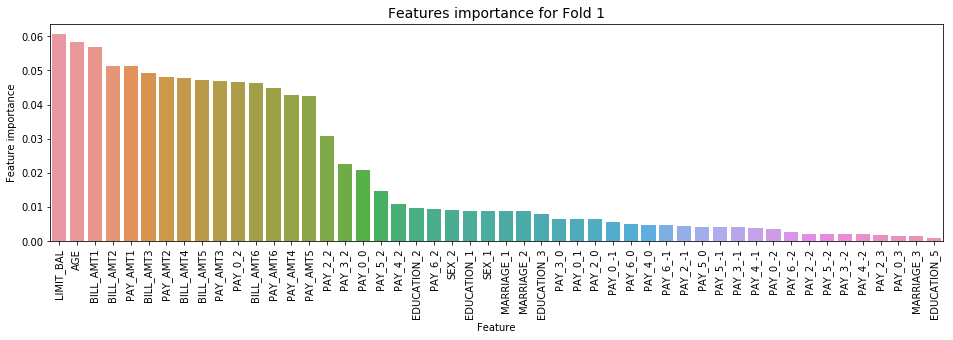

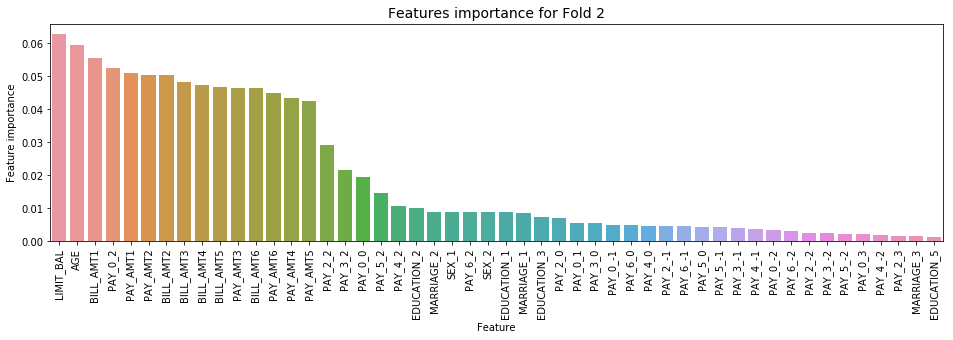

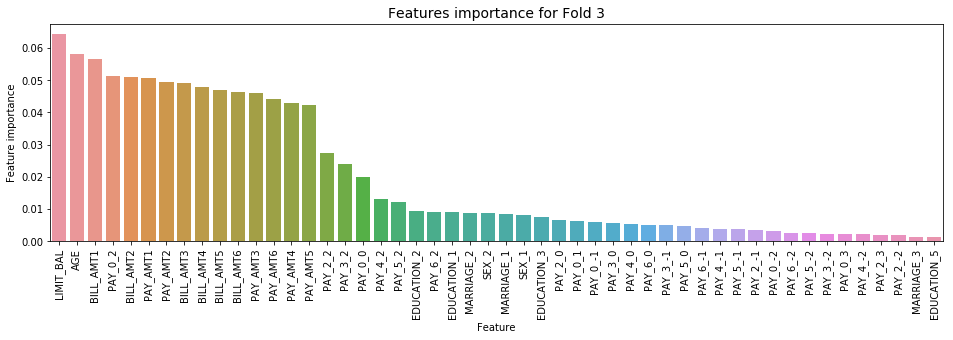

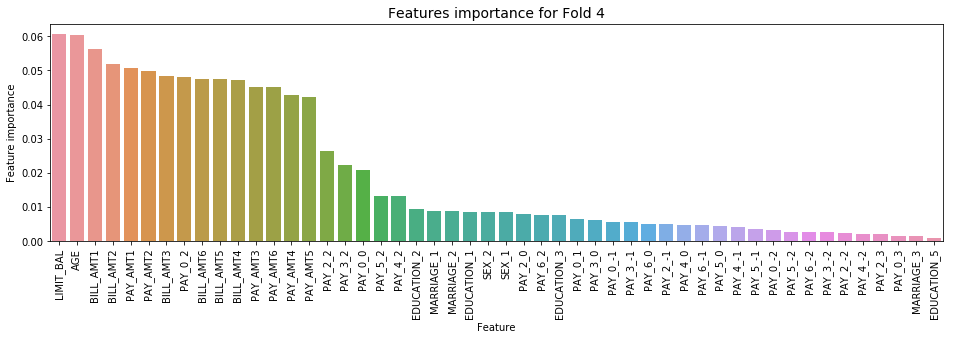

In [20]:
for idx,estimator in enumerate(scoresLR['estimator']):
    tmp = pd.DataFrame({'Feature': X.columns, 'Feature importance': estimator.feature_importances_})
    tmp = tmp.sort_values(by='Feature importance',ascending=False)
    plt.figure(figsize = (16,4))
    plt.title('Features importance for Fold {}'.format(idx+1),fontsize=14)
    s = sns.barplot(x='Feature',y='Feature importance',data=tmp.iloc[:50,:])
    s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.show()
    

From the feature figures above, according to random forest model, we can find that the most important features are **LIMIT_BAL, AGE and BILL_AMT1.**

### 4.3.2 Handling imbalance with SMOTE

In [21]:
classifier=RandomForestClassifier(n_jobs=-1,random_state=0)
kf = KFold(n_splits=4, random_state=0, shuffle=True)
imba_pipeline = make_pipeline(SMOTE(random_state=0), 
                              classifier)
scoresLR = cross_validate(  imba_pipeline, X, Y, cv=kf,scoring=('accuracy','precision','recall','f1','roc_auc'),n_jobs=-1,return_estimator =True)
results=pd.DataFrame.from_dict(scoresLR).drop(['score_time','estimator'],axis=1).transpose()
results.columns=['Fold 1','Fold 2','Fold 3','Fold 4']
results['Average']=results.mean(axis=1)
rf_smote=results['Average']
display(results)

,Fold 1,Fold 2,Fold 3,Fold 4,Average
fit_time,6.779334,6.704656,6.689828,6.561072,6.683723
test_accuracy,0.798000,0.798000,0.789067,0.794000,0.794767
test_precision,0.541756,0.541524,0.527106,0.553020,0.540852
test_recall,0.465074,0.482274,0.484685,0.483852,0.478971
test_f1,0.500495,0.510184,0.505006,0.516129,0.507954
test_roc_auc,0.754559,0.763363,0.749088,0.759950,0.756740


#### Feature Importance

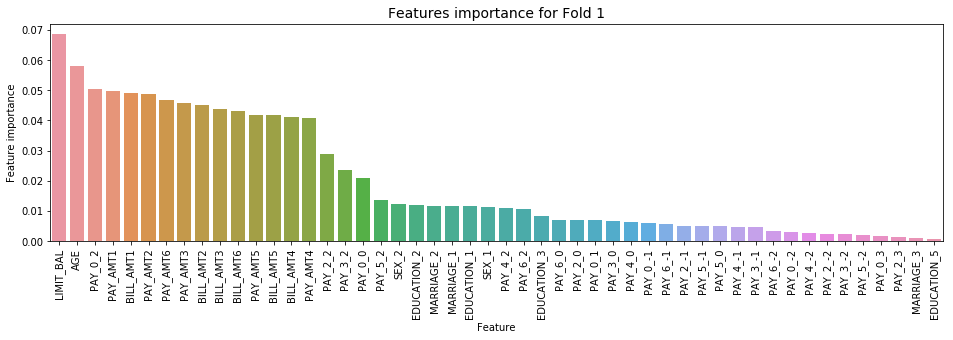

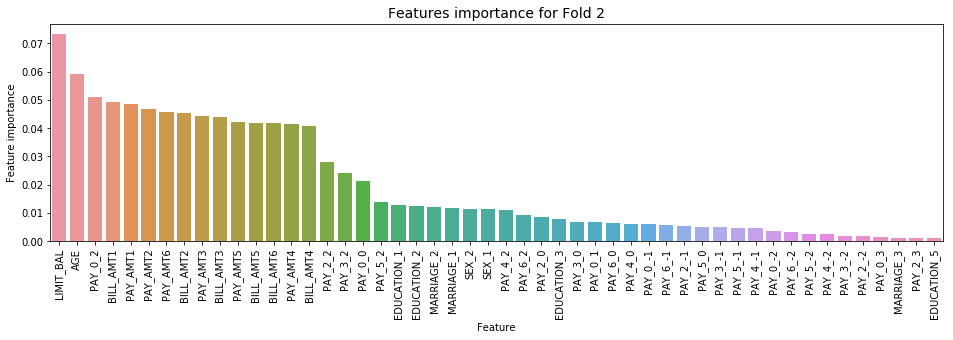

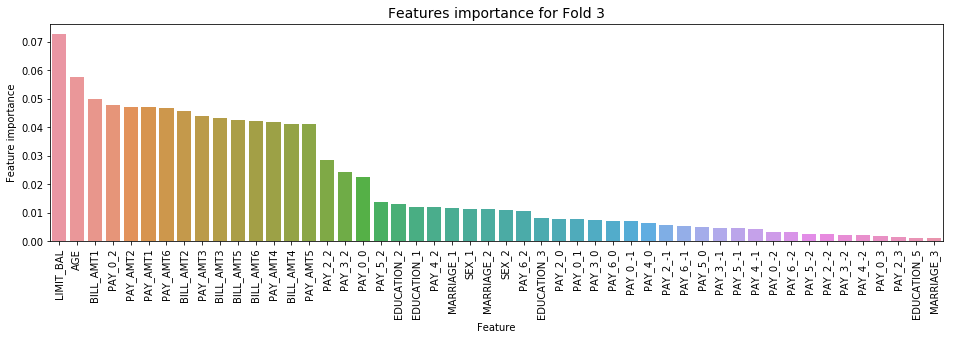

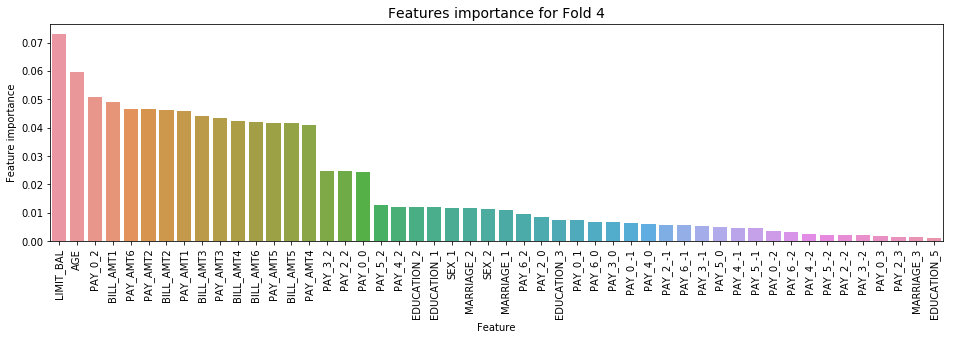

In [22]:
for idx,estimator in enumerate(scoresLR['estimator']):
    tmp = pd.DataFrame({'Feature': X.columns, 'Feature importance': estimator[1].feature_importances_})
    tmp = tmp.sort_values(by='Feature importance',ascending=False)
    plt.figure(figsize = (16,4))
    plt.title('Features importance for Fold {}'.format(idx+1),fontsize=14)
    s = sns.barplot(x='Feature',y='Feature importance',data=tmp.iloc[:50,:])
    s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.show()
    

From the feature figures above, according to random forest model with SMOTE, we can find that the most important features are **LIMIT_BAL, AGE and BILL_AMT1.**

## 4.4. Gradient Boosting
### 4.4.1 Handling imbalance with class weight

In [23]:
sample_weight=compute_sample_weight(class_weight='balanced', y=Y)
classifier=GradientBoostingClassifier(random_state=0)
kf = KFold(n_splits=4, random_state=0, shuffle=True)
scoresLR = cross_validate( classifier, X,Y, cv=kf,scoring=('accuracy','precision','recall','f1','roc_auc'),n_jobs=-1,fit_params={'sample_weight': sample_weight},return_estimator =True)
results=pd.DataFrame.from_dict(scoresLR).drop(['score_time','estimator'],axis=1).transpose()
results.columns=['Fold 1','Fold 2','Fold 3','Fold 4']
results['Average']=results.mean(axis=1)
gdb=results['Average']
display(results)

,Fold 1,Fold 2,Fold 3,Fold 4,Average
fit_time,10.226575,10.230534,10.204596,10.221132,10.220709
test_accuracy,0.755600,0.762133,0.752400,0.769733,0.759967
test_precision,0.456437,0.466846,0.457821,0.494555,0.468915
test_recall,0.645221,0.636919,0.625826,0.640047,0.637003
test_f1,0.534653,0.538780,0.528800,0.557973,0.540051
test_roc_auc,0.786630,0.782680,0.768505,0.787841,0.781414


#### Feature Importance

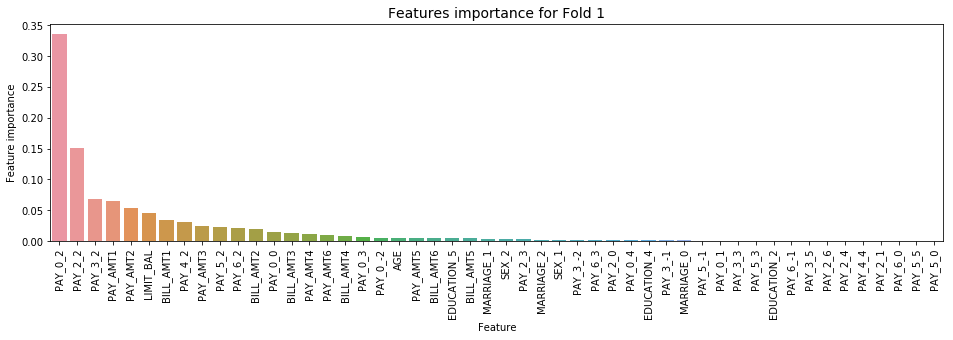

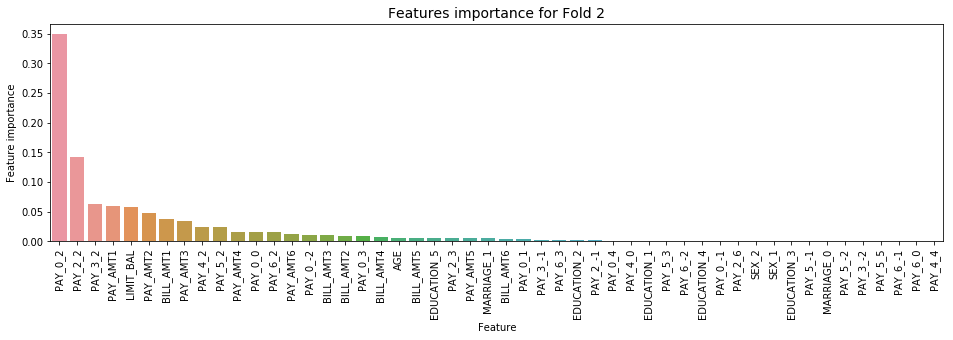

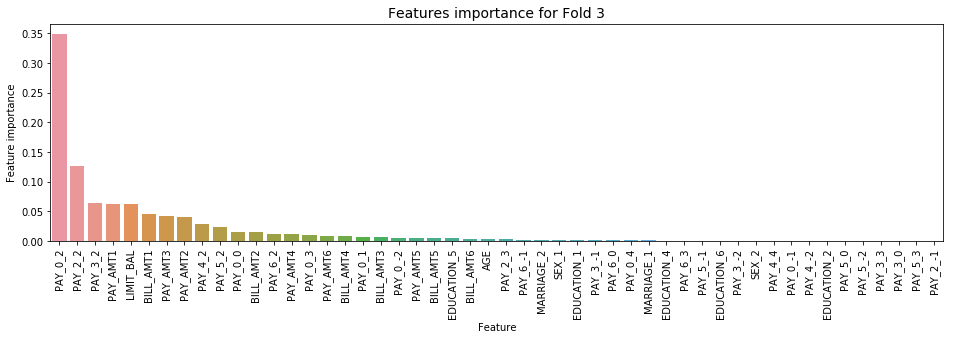

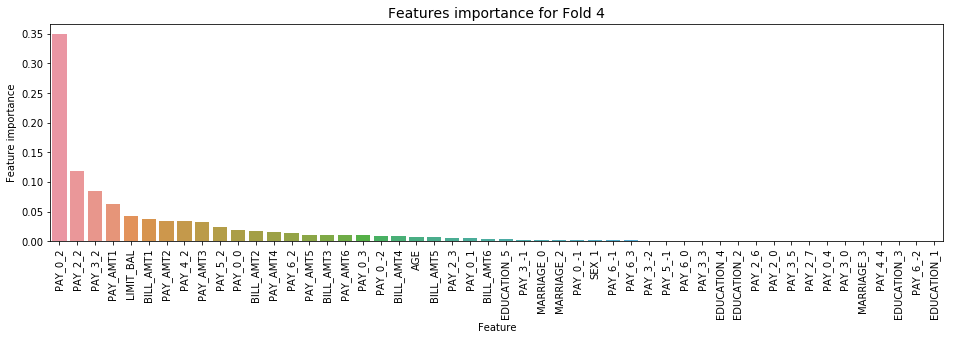

In [24]:
for idx,estimator in enumerate(scoresLR['estimator']):
    tmp = pd.DataFrame({'Feature': X.columns, 'Feature importance': estimator.feature_importances_})
    tmp = tmp.sort_values(by='Feature importance',ascending=False)
    plt.figure(figsize = (16,4))
    plt.title('Features importance for Fold {}'.format(idx+1),fontsize=14)
    s = sns.barplot(x='Feature',y='Feature importance',data=tmp.iloc[:50,:])
    s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.show()
    

According to the Gradient boosting method results above, the most important features are **PAY_0_2, PAY_2_2, PAY_3_2.**

### 4.4.2 Handling imbalance with SMOTE

In [25]:
classifier=GradientBoostingClassifier()
kf = KFold(n_splits=4, random_state=0, shuffle=True)
imba_pipeline = make_pipeline(SMOTE(random_state=0), 
                              classifier)
scoresLR = cross_validate(  imba_pipeline, X, Y, cv=kf,scoring=('accuracy','precision','recall','f1','roc_auc'),n_jobs=-1,return_estimator =True)
results=pd.DataFrame.from_dict(scoresLR).drop(['score_time','estimator'],axis=1).transpose()
results.columns=['Fold 1','Fold 2','Fold 3','Fold 4']
results['Average']=results.mean(axis=1)
gdb_smote=results['Average']
display(results)

,Fold 1,Fold 2,Fold 3,Fold 4,Average
fit_time,21.969145,21.996028,21.916065,21.994285,21.968881
test_accuracy,0.796667,0.800000,0.788533,0.800800,0.796500
test_precision,0.535501,0.544678,0.523810,0.566859,0.542712
test_recall,0.494485,0.506724,0.521922,0.520258,0.510847
test_f1,0.514176,0.525016,0.522864,0.542560,0.526154
test_roc_auc,0.766989,0.769430,0.757320,0.779244,0.768246


#### Feature Importance

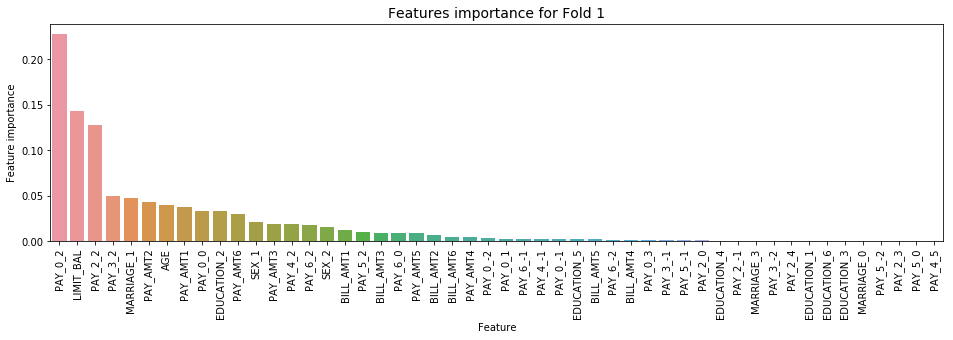

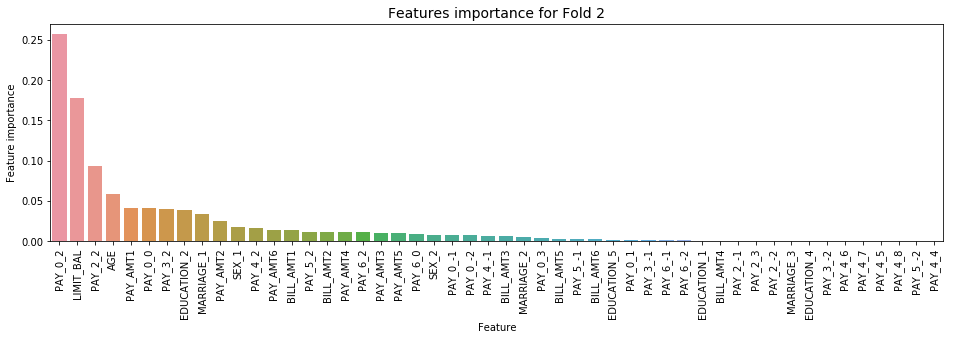

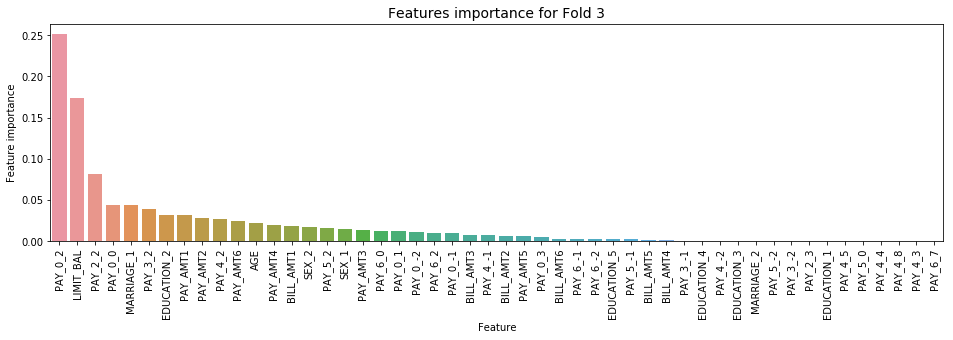

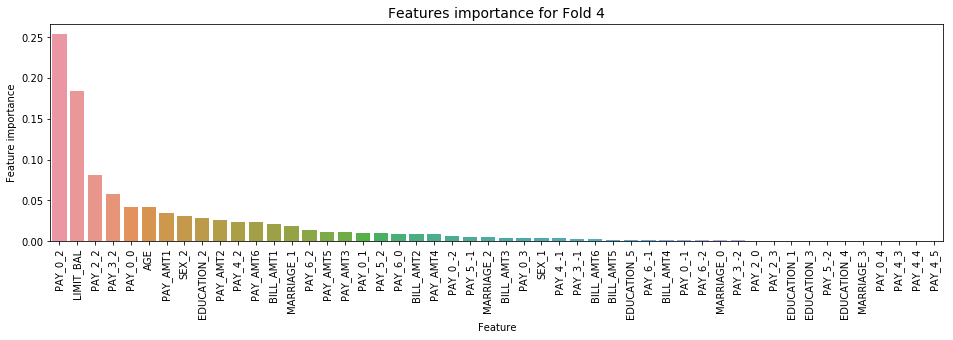

In [26]:
for idx,estimator in enumerate(scoresLR['estimator']):
    tmp = pd.DataFrame({'Feature': X.columns, 'Feature importance': estimator[1].feature_importances_})
    tmp = tmp.sort_values(by='Feature importance',ascending=False)
    plt.figure(figsize = (16,4))
    plt.title('Features importance for Fold {}'.format(idx+1),fontsize=14)
    s = sns.barplot(x='Feature',y='Feature importance',data=tmp.iloc[:50,:])
    s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.show()
    

With SMOTE, the most important features are **PAY_0_2, LIMIT_BAL, PAY_2_2.**

# 4.5. AdaBoost
## 4.5.1. Handling imbalance with class weight

In [27]:
sample_weight=compute_sample_weight(class_weight='balanced', y=Y)
classifier=AdaBoostClassifier(random_state=0)
kf = KFold(n_splits=4, random_state=0, shuffle=True)
scoresLR = cross_validate( classifier, X,Y, cv=kf,scoring=('accuracy','precision','recall','f1','roc_auc'),n_jobs=-1,fit_params={'sample_weight': sample_weight},return_estimator =True)
results=pd.DataFrame.from_dict(scoresLR).drop(['score_time','estimator'],axis=1).transpose()
results.columns=['Fold 1','Fold 2','Fold 3','Fold 4']
results['Average']=results.mean(axis=1)
adb=results['Average']
display(results)

,Fold 1,Fold 2,Fold 3,Fold 4,Average
fit_time,2.415617,2.408077,2.404026,2.400190,2.406977
test_accuracy,0.754267,0.758533,0.750800,0.769333,0.758233
test_precision,0.453007,0.460461,0.454907,0.493623,0.465499
test_recall,0.623162,0.622861,0.618018,0.613623,0.619416
test_f1,0.524632,0.529488,0.524064,0.547120,0.531326
test_roc_auc,0.778030,0.776792,0.763592,0.780833,0.774812


#### Feature Importance

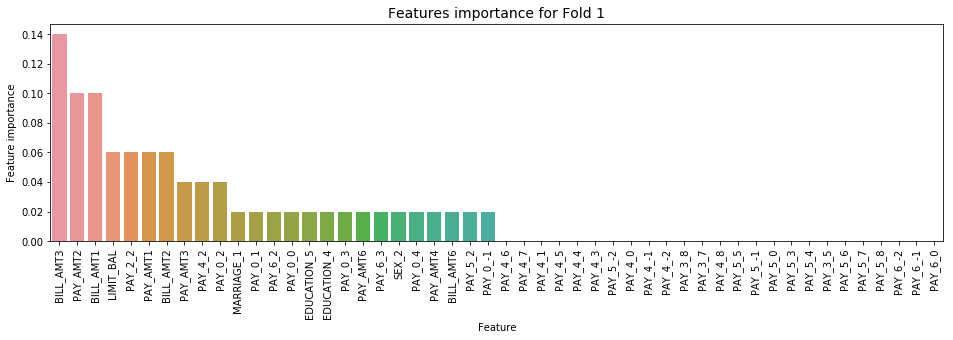

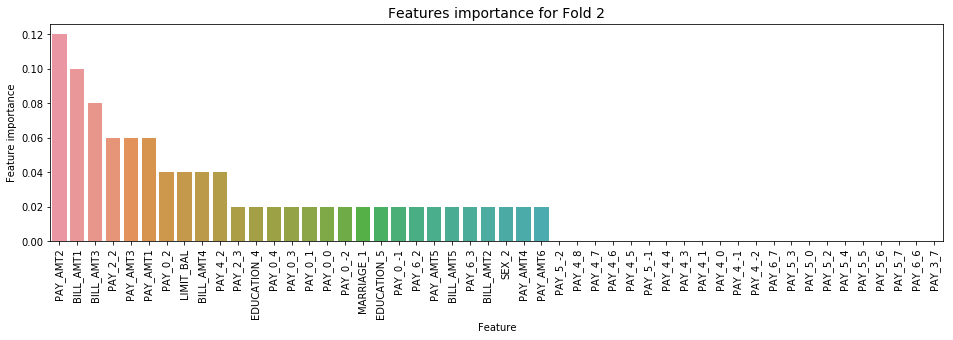

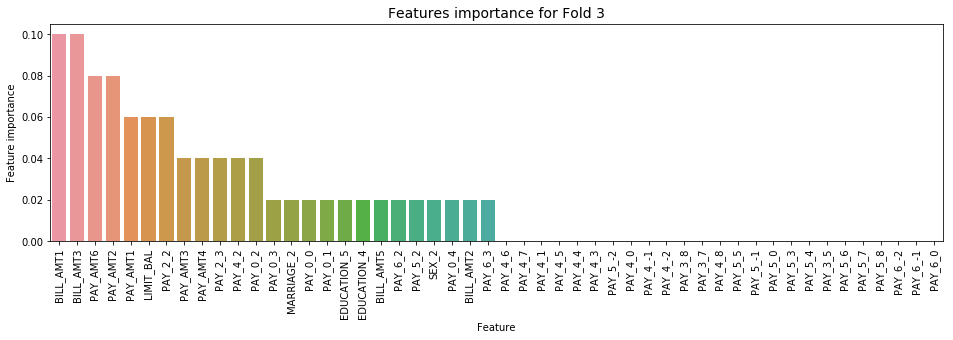

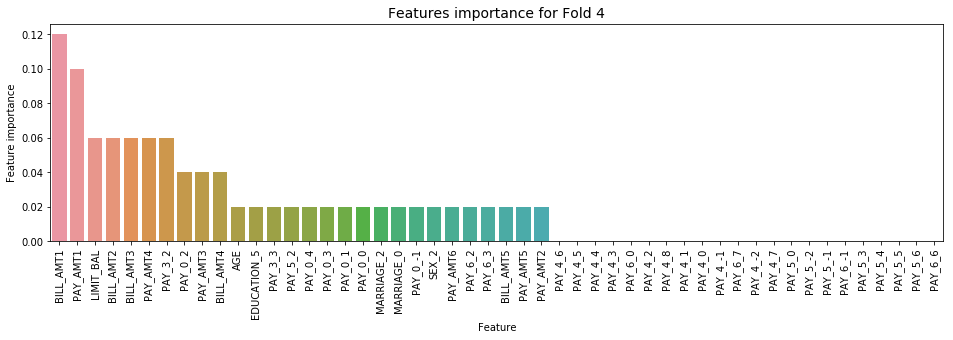

In [28]:
for idx,estimator in enumerate(scoresLR['estimator']):
    tmp = pd.DataFrame({'Feature': X.columns, 'Feature importance': estimator.feature_importances_})
    tmp = tmp.sort_values(by='Feature importance',ascending=False)
    plt.figure(figsize = (16,4))
    plt.title('Features importance for Fold {}'.format(idx+1),fontsize=14)
    s = sns.barplot(x='Feature',y='Feature importance',data=tmp.iloc[:50,:])
    s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.show()
    

According to the Adaboost model with class weight, the most important features are **BILL_AMT1, PAY_AMT1, LIMIT_BAL.**

### 4.5.2 Handling imbalance with SMOTE

In [29]:
classifier=AdaBoostClassifier(random_state=0)
kf = KFold(n_splits=4, random_state=0, shuffle=True)
imba_pipeline = make_pipeline(SMOTE(random_state=0), 
                              classifier)
scoresLR = cross_validate(  imba_pipeline, X, Y, cv=kf,scoring=('accuracy','precision','recall','f1','roc_auc'),return_estimator =True)
results=pd.DataFrame.from_dict(scoresLR).drop(['score_time','estimator'],axis=1).transpose()
results.columns=['Fold 1','Fold 2','Fold 3','Fold 4']
results['Average']=results.mean(axis=1)
adb_smote=results['Average']
display(results)

,Fold 1,Fold 2,Fold 3,Fold 4,Average
fit_time,7.947209,7.968392,7.764423,7.818217,7.874560
test_accuracy,0.760400,0.765867,0.769067,0.784400,0.769933
test_precision,0.457671,0.469849,0.482285,0.525029,0.483708
test_recall,0.546569,0.571516,0.547748,0.529654,0.548871
test_f1,0.498185,0.515720,0.512936,0.527331,0.513543
test_roc_auc,0.750466,0.754124,0.743426,0.765300,0.753329


#### Feature Importance

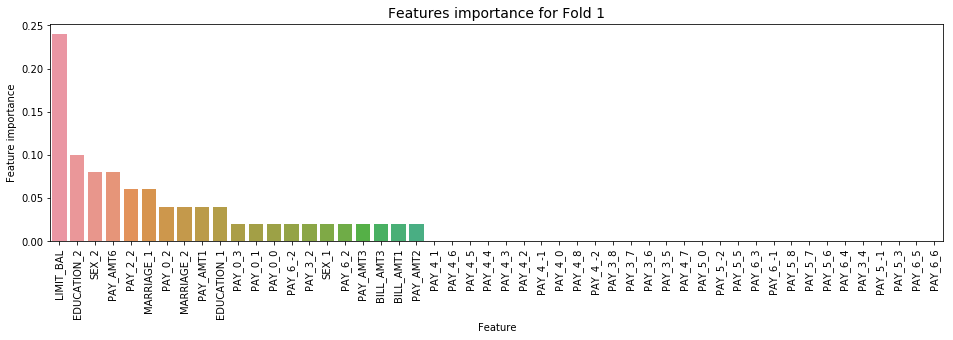

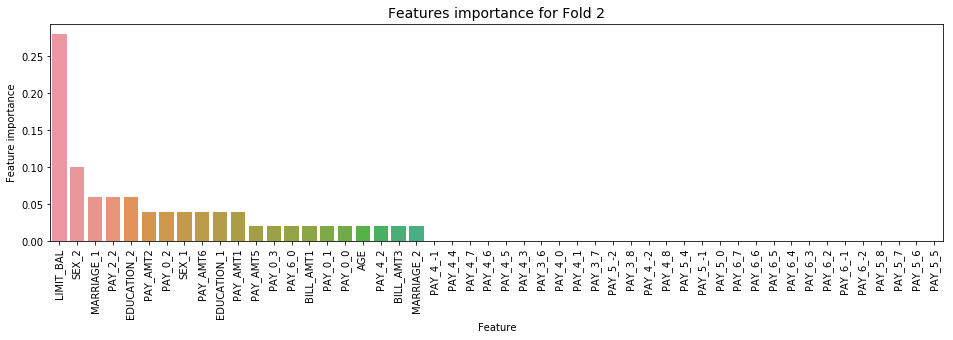

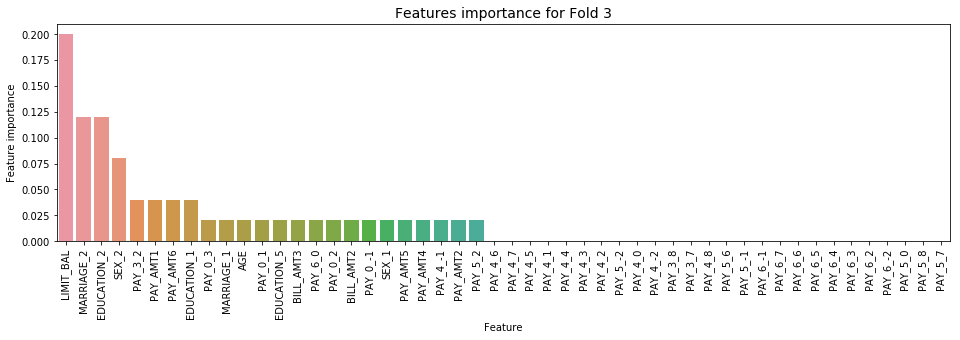

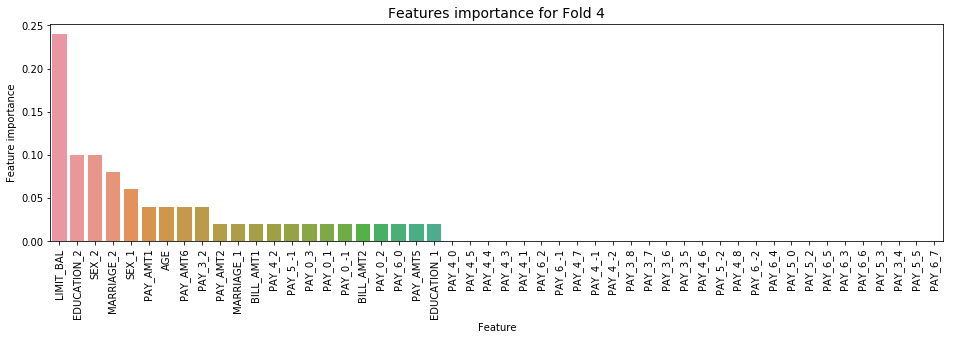

In [30]:
for idx,estimator in enumerate(scoresLR['estimator']):
    tmp = pd.DataFrame({'Feature': X.columns, 'Feature importance': estimator[1].feature_importances_})
    tmp = tmp.sort_values(by='Feature importance',ascending=False)
    plt.figure(figsize = (16,4))
    plt.title('Features importance for Fold {}'.format(idx+1),fontsize=14)
    s = sns.barplot(x='Feature',y='Feature importance',data=tmp.iloc[:50,:])
    s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.show()
    

For Adaboost with SMOTE, the most important features are **LIMIT_BAL, SEX_2, EDUCATION_2.**

# 4.6. XGBoost
## 4.6.1. Handling imbalance with class weight

In [31]:
weight=compute_class_weight('balanced',np.unique(Y),Y)[1]
classifier=XGBClassifier(scale_pos_weight=weight,random_state=0)
kf = KFold(n_splits=4, random_state=0, shuffle=True)
scoresLR = cross_validate( classifier, X,Y, cv=kf,scoring=('accuracy','precision','recall','f1','roc_auc'),n_jobs=-1,return_estimator =True)
results=pd.DataFrame.from_dict(scoresLR).drop(['score_time','estimator'],axis=1).transpose()
results.columns=['Fold 1','Fold 2','Fold 3','Fold 4']
results['Average']=results.mean(axis=1)
xgb=results['Average']
display(results)

,Fold 1,Fold 2,Fold 3,Fold 4,Average
fit_time,4.329766,4.305481,4.348011,4.310652,4.323477
test_accuracy,0.807200,0.808133,0.798000,0.809200,0.805633
test_precision,0.564404,0.566152,0.547893,0.593407,0.567964
test_recall,0.499387,0.515281,0.515315,0.507340,0.509331
test_f1,0.529909,0.539520,0.531105,0.547009,0.536886
test_roc_auc,0.786500,0.782160,0.769137,0.787617,0.781353


#### Feature Importance

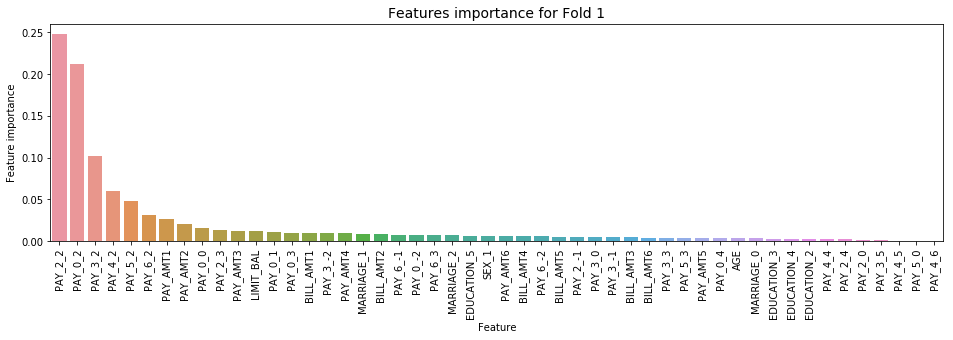

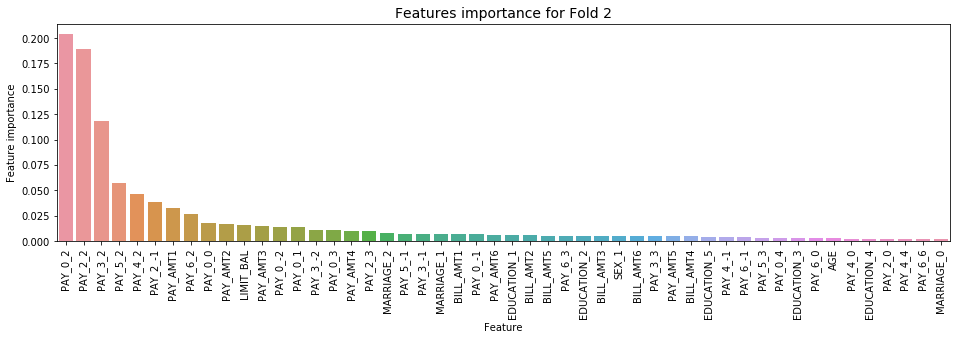

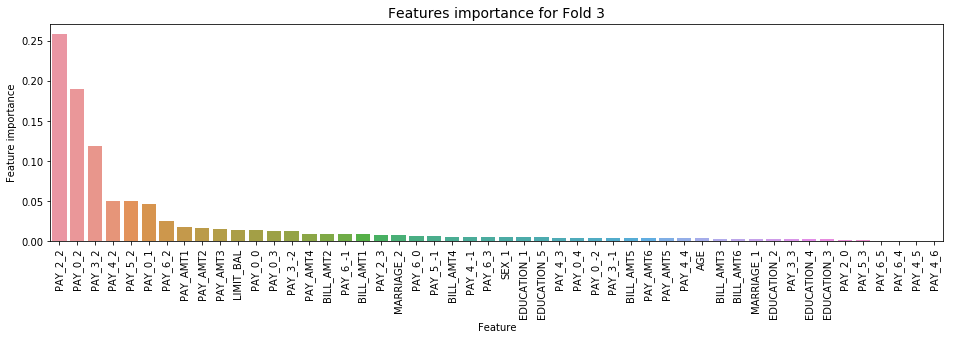

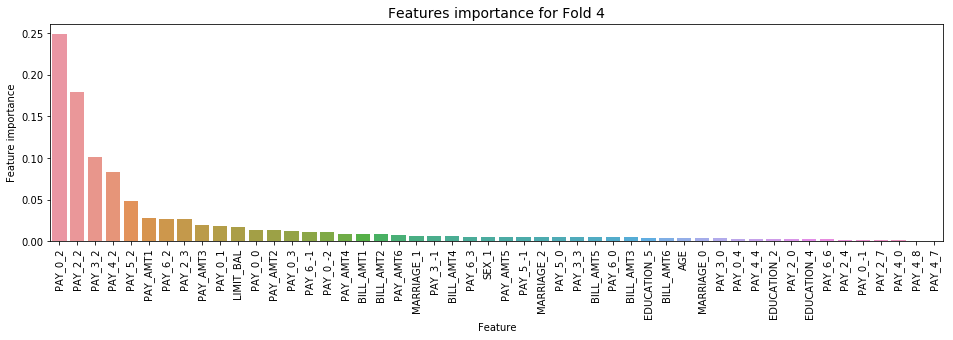

In [32]:
for idx,estimator in enumerate(scoresLR['estimator']):
    tmp = pd.DataFrame({'Feature': X.columns, 'Feature importance': estimator.feature_importances_})
    tmp = tmp.sort_values(by='Feature importance',ascending=False)
    plt.figure(figsize = (16,4))
    plt.title('Features importance for Fold {}'.format(idx+1),fontsize=14)
    s = sns.barplot(x='Feature',y='Feature importance',data=tmp.iloc[:50,:])
    s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.show()
    

According to the result of XGBoost with class height, the most important features are **PAY_0_2, PAY_2_2, PAY_3_2.**

## 4.6.2 Handling imbalance with SMOTE

In [33]:
classifier=XGBClassifier(random_state=0)
kf = KFold(n_splits=4, random_state=0, shuffle=True)
imba_pipeline = make_pipeline(SMOTE(random_state=0), 
                              classifier)
scoresLR = cross_validate(  imba_pipeline, X, Y, cv=kf,scoring=('accuracy','precision','recall','f1','roc_auc'),return_estimator =True)
results=pd.DataFrame.from_dict(scoresLR).drop(['score_time','estimator'],axis=1).transpose()
results.columns=['Fold 1','Fold 2','Fold 3','Fold 4']
results['Average']=results.mean(axis=1)
xgb_smote=results['Average']
display(results)

,Fold 1,Fold 2,Fold 3,Fold 4,Average
fit_time,10.727941,10.721064,10.646861,10.637681,10.683387
test_accuracy,0.799200,0.801600,0.788533,0.801200,0.797633
test_precision,0.542396,0.548748,0.524398,0.569010,0.546138
test_recall,0.493873,0.509169,0.509910,0.513212,0.506541
test_f1,0.516998,0.528218,0.517052,0.539673,0.525485
test_roc_auc,0.766382,0.770239,0.758321,0.781835,0.769194


#### Feature Importance

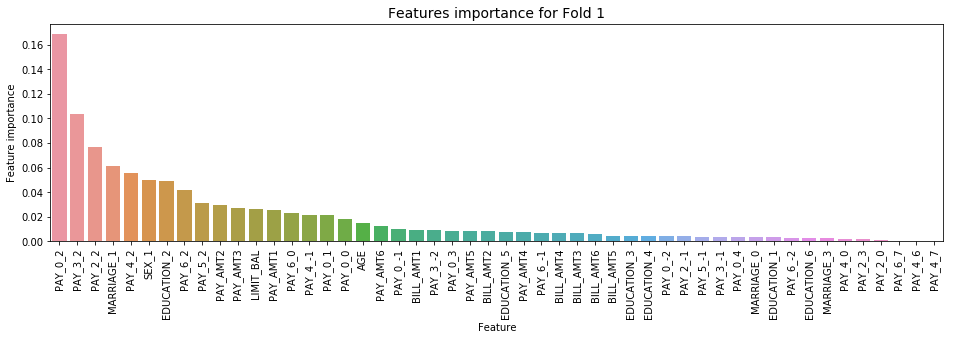

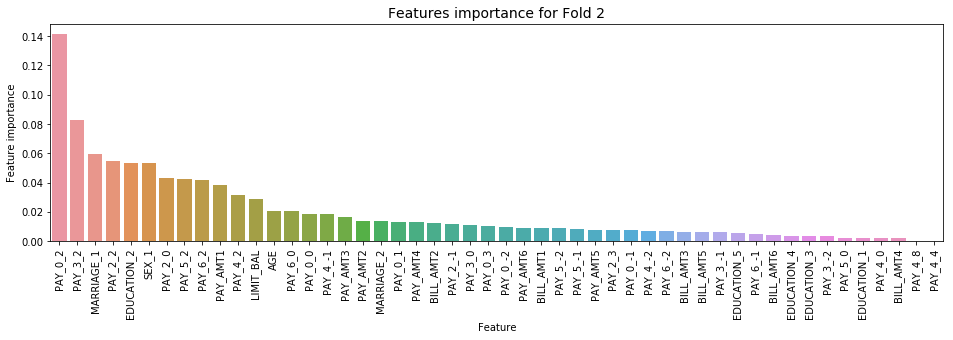

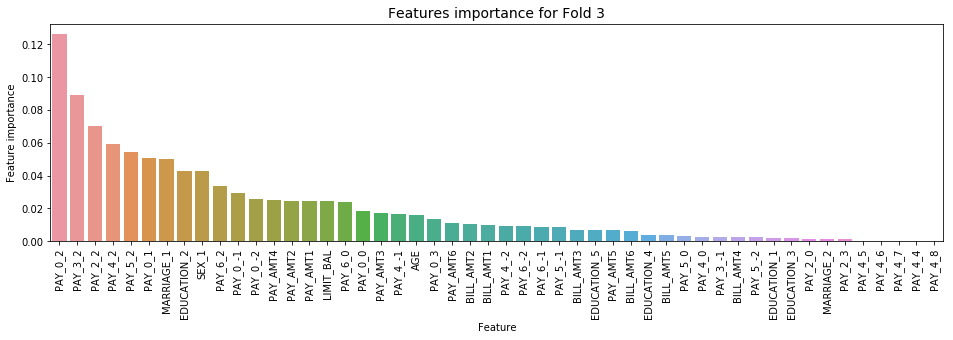

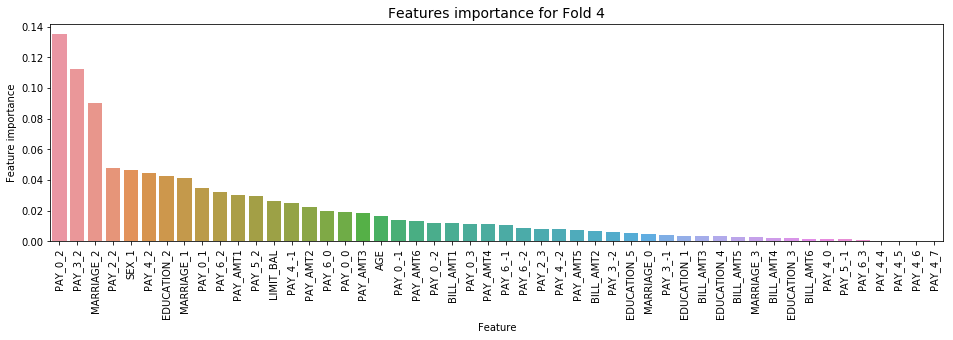

In [34]:
for idx,estimator in enumerate(scoresLR['estimator']):
    tmp = pd.DataFrame({'Feature': X.columns, 'Feature importance': estimator[1].feature_importances_})
    tmp = tmp.sort_values(by='Feature importance',ascending=False)
    plt.figure(figsize = (16,4))
    plt.title('Features importance for Fold {}'.format(idx+1),fontsize=14)
    s = sns.barplot(x='Feature',y='Feature importance',data=tmp.iloc[:50,:])
    s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.show()
    

From the results of XGboost with SMOTE, we can find the most important features are **PAY_0_2, PAY_3_2, MARRIAGE_2.**

## 4.7. CATBoost
### 4.7.1 Handling imbalance with class weight


In [35]:
weight=compute_class_weight('balanced',np.unique(Y),Y)
classifier=CatBoostClassifier(class_weights=weight,silent=True,random_state=0)
kf = KFold(n_splits=4, random_state=0, shuffle=True)
scoresLR = cross_validate( classifier, X,Y, cv=kf,scoring=('accuracy','precision','recall','f1','roc_auc'),n_jobs=-1,return_estimator =True)
results=pd.DataFrame.from_dict(scoresLR).drop(['score_time','estimator'],axis=1).transpose()
results.columns=['Fold 1','Fold 2','Fold 3','Fold 4']
results['Average']=results.mean(axis=1)
cat=results['Average']
display(results)

,Fold 1,Fold 2,Fold 3,Fold 4,Average
fit_time,44.087162,44.225903,43.771107,44.038946,44.030780
test_accuracy,0.766933,0.768133,0.758000,0.775600,0.767167
test_precision,0.472249,0.476234,0.465596,0.504854,0.479733
test_recall,0.604779,0.630807,0.609610,0.610687,0.613971
test_f1,0.530360,0.542729,0.527958,0.552750,0.538450
test_roc_auc,0.780213,0.779590,0.766978,0.787043,0.778456


#### Feature Importance

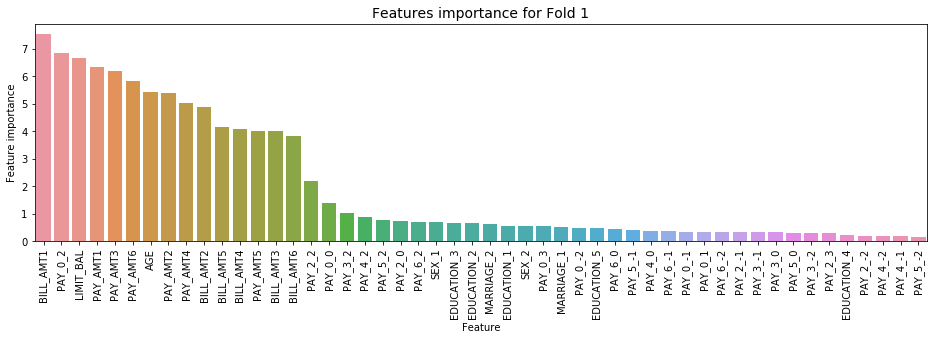

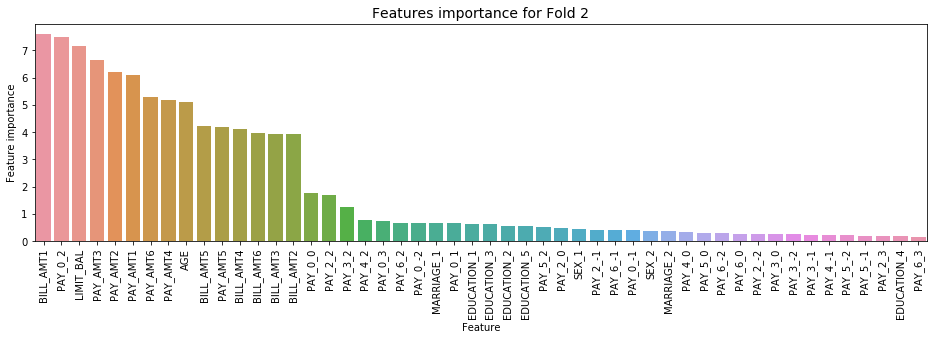

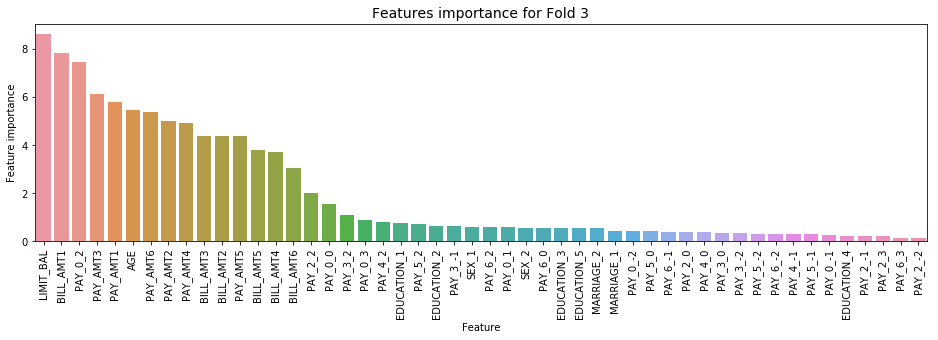

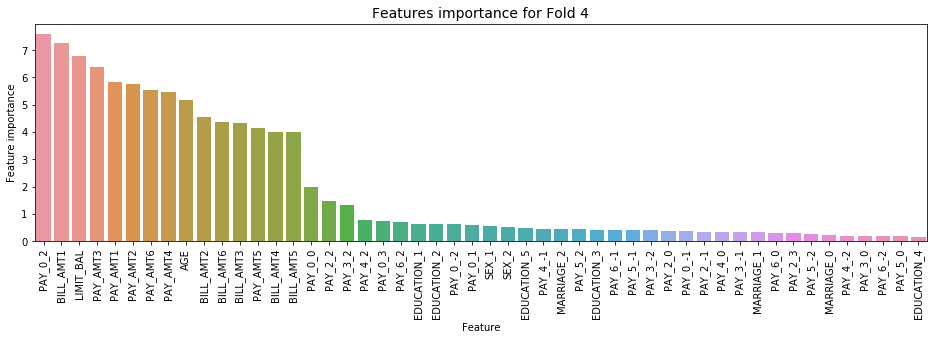

In [36]:
for idx,estimator in enumerate(scoresLR['estimator']):
    tmp = pd.DataFrame({'Feature': X.columns, 'Feature importance': estimator.feature_importances_})
    tmp = tmp.sort_values(by='Feature importance',ascending=False)
    plt.figure(figsize = (16,4))
    plt.title('Features importance for Fold {}'.format(idx+1),fontsize=14)
    s = sns.barplot(x='Feature',y='Feature importance',data=tmp.iloc[:50,:])
    s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.show()
    

For CATboost with class weight, the most important features are **BILL_AMT1, PAY_0_2, LIMIT_BAL.**

### 4.7.2. Handling imbalance with SMOTE
### Handling imbalance with class weight


In [37]:
classifier=CatBoostClassifier(silent=True,random_state=0)
kf = KFold(n_splits=4, random_state=0, shuffle=True)
imba_pipeline = make_pipeline(SMOTE(random_state=0), 
                              classifier)
scoresLR = cross_validate(  imba_pipeline, X, Y, cv=kf,scoring=('accuracy','precision','recall','f1','roc_auc'),return_estimator =True)
results=pd.DataFrame.from_dict(scoresLR).drop(['score_time','estimator'],axis=1).transpose()
results.columns=['Fold 1','Fold 2','Fold 3','Fold 4']
results['Average']=results.mean(axis=1)
cat_smote=results['Average']
display(results)

,Fold 1,Fold 2,Fold 3,Fold 4,Average
fit_time,15.650305,15.724359,15.580118,17.097481,16.013066
test_accuracy,0.818533,0.820267,0.812133,0.814267,0.816300
test_precision,0.632713,0.642857,0.619403,0.651663,0.636659
test_recall,0.395833,0.396088,0.398799,0.391075,0.395449
test_f1,0.486996,0.490166,0.485203,0.488807,0.487793
test_roc_auc,0.773021,0.773118,0.763264,0.786180,0.773896


#### Feature Importance

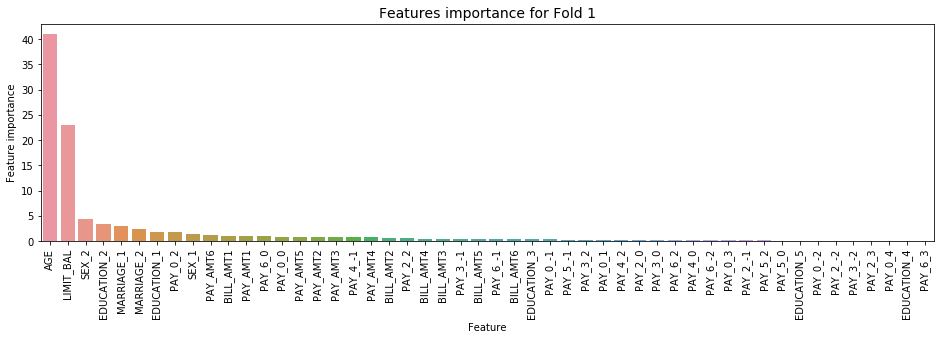

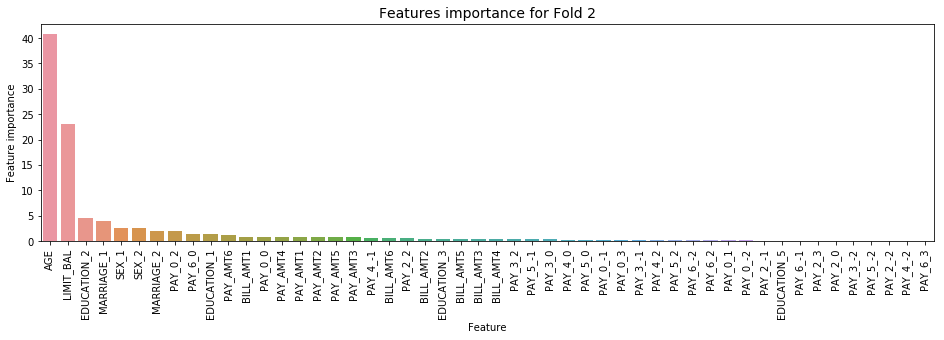

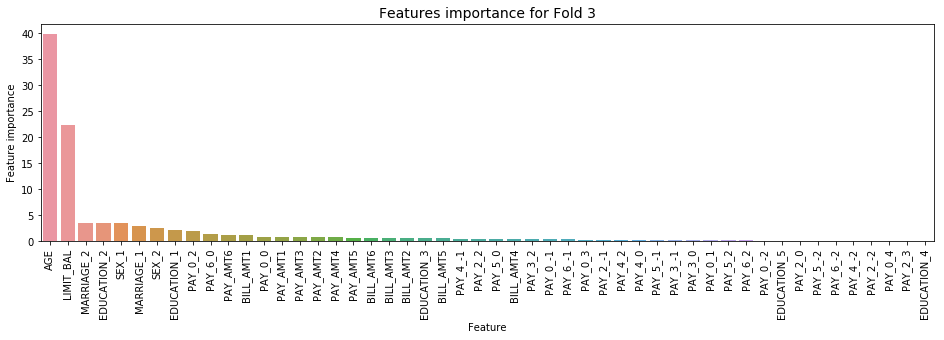

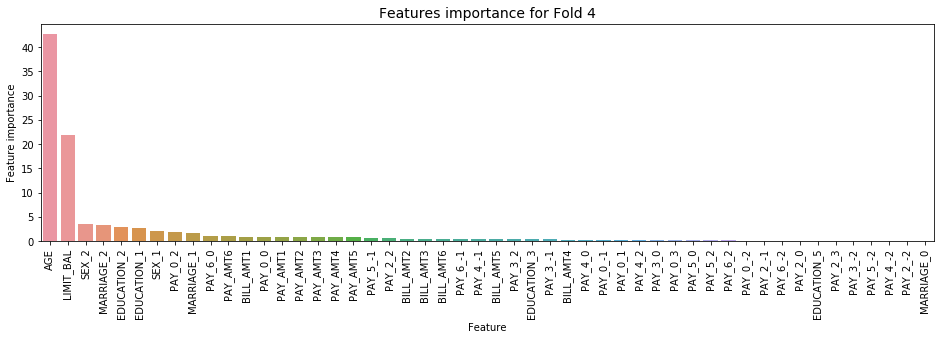

In [38]:
for idx,estimator in enumerate(scoresLR['estimator']):
    tmp = pd.DataFrame({'Feature': X.columns, 'Feature importance': estimator[1].feature_importances_})
    tmp = tmp.sort_values(by='Feature importance',ascending=False)
    plt.figure(figsize = (16,4))
    plt.title('Features importance for Fold {}'.format(idx+1),fontsize=14)
    s = sns.barplot(x='Feature',y='Feature importance',data=tmp.iloc[:50,:])
    s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.show()
    

For CATboost with SMOTE, the most important features are **AGE, LIMIT_BAL, SEX_2.**

## 4.8. Lightbgm
### 4.8.1 Handling imbalance with class weight


In [39]:
weight=compute_class_weight('balanced',np.unique(Y),Y)
classifier=LGBMClassifier(class_weights=weight,silent=True, n_jobs=-1,random_state=0)
kf = KFold(n_splits=4, random_state=0, shuffle=True)
scoresLR = cross_validate( classifier, X,Y, cv=kf,scoring=('accuracy','precision','recall','f1','roc_auc'),n_jobs=-1,return_estimator=True)
results=pd.DataFrame.from_dict(scoresLR).drop(['score_time','estimator'],axis=1).transpose()
results.columns=['Fold 1','Fold 2','Fold 3','Fold 4']
results['Average']=results.mean(axis=1)
lbgm=results['Average']
display(results)

,Fold 1,Fold 2,Fold 3,Fold 4,Average
fit_time,1.268610,1.254421,1.226225,1.219023,1.242070
test_accuracy,0.825200,0.821600,0.817867,0.814533,0.819800
test_precision,0.678930,0.662309,0.659552,0.664211,0.666250
test_recall,0.373162,0.371638,0.371171,0.370523,0.371623
test_f1,0.481613,0.476116,0.475019,0.475688,0.477109
test_roc_auc,0.785947,0.781250,0.767768,0.785808,0.780193


#### Feature Importance

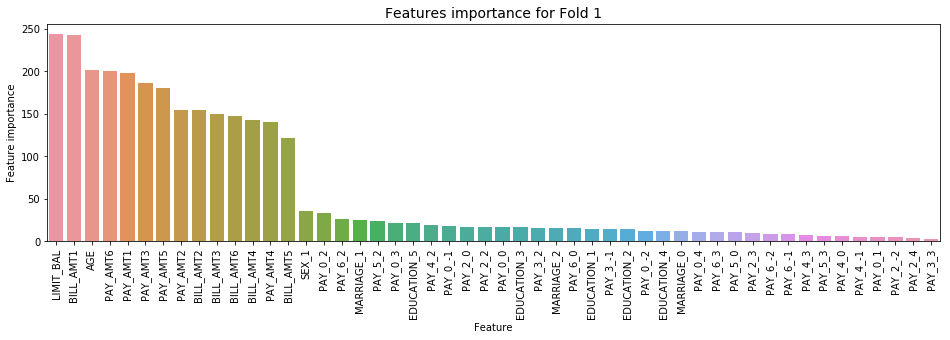

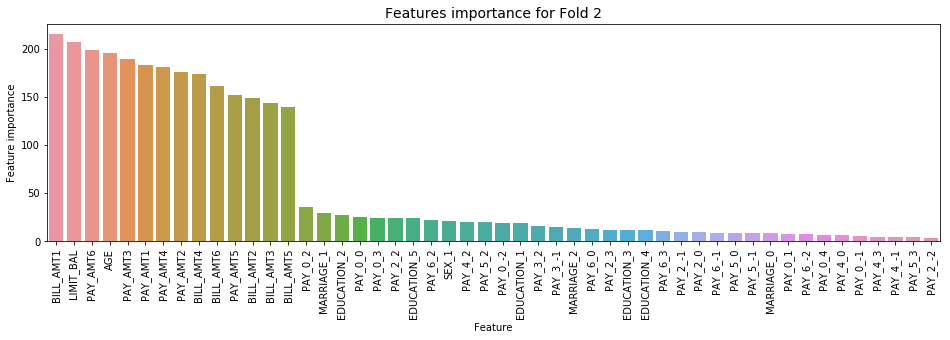

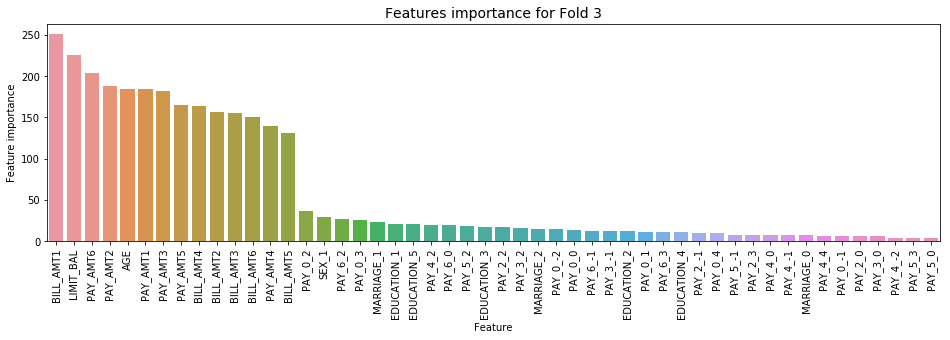

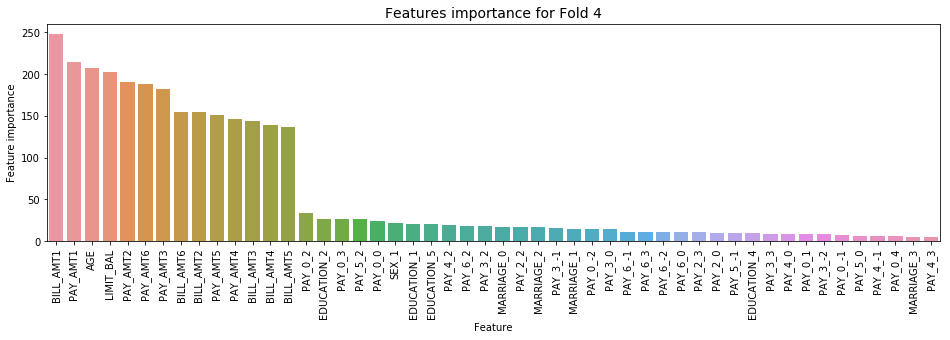

In [40]:
for idx,estimator in enumerate(scoresLR['estimator']):
    tmp = pd.DataFrame({'Feature': X.columns, 'Feature importance': estimator.feature_importances_})
    tmp = tmp.sort_values(by='Feature importance',ascending=False)
    plt.figure(figsize = (16,4))
    plt.title('Features importance for Fold {}'.format(idx+1),fontsize=14)
    s = sns.barplot(x='Feature',y='Feature importance',data=tmp.iloc[:50,:])
    s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.show()
    

According to the results of Lightbgm, the most important features are **BILL_AMT1, LIMIT_BAL, PAY_AMT6.**

### 4.8.2. Handling imbalance with SMOTE

In [41]:
classifier=LGBMClassifier(silent=True, n_jobs=-1,random_state=0)
kf = KFold(n_splits=4, random_state=0, shuffle=True)
imba_pipeline = make_pipeline(SMOTE(random_state=0), 
                              classifier)
scoresLR = cross_validate(  imba_pipeline, X, Y, cv=kf,scoring=('accuracy','precision','recall','f1','roc_auc'),return_estimator=True)
results=pd.DataFrame.from_dict(scoresLR).drop(['score_time','estimator'],axis=1).transpose()
results.columns=['Fold 1','Fold 2','Fold 3','Fold 4']
results['Average']=results.mean(axis=1)
lbgm_smote=results['Average']
display(results)

,Fold 1,Fold 2,Fold 3,Fold 4,Average
fit_time,6.422546,6.432602,6.343334,6.322313,6.380199
test_accuracy,0.815867,0.815600,0.805067,0.810133,0.811667
test_precision,0.610768,0.608958,0.580492,0.620362,0.605145
test_recall,0.424020,0.432152,0.439640,0.422196,0.429502
test_f1,0.500542,0.505542,0.500342,0.502446,0.502218
test_roc_auc,0.773751,0.776132,0.763960,0.782786,0.774157


#### Feature Importance

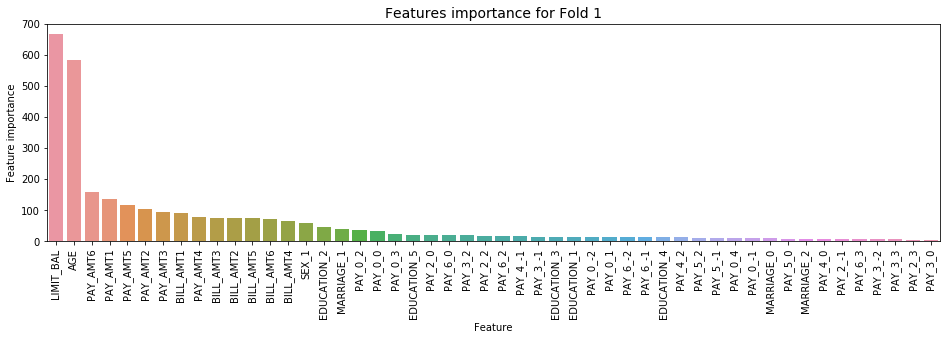

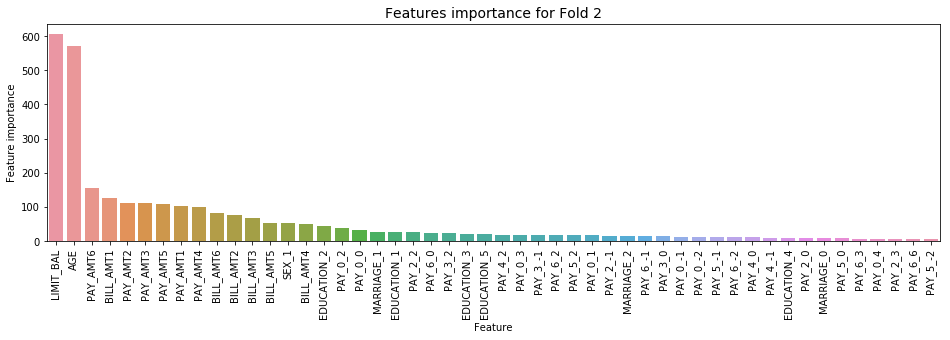

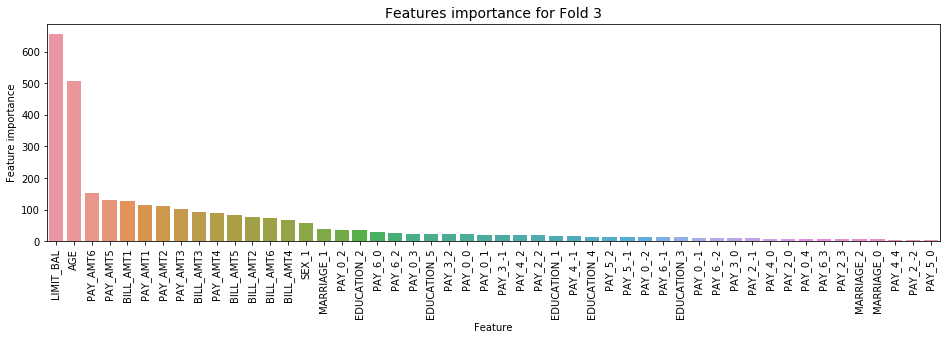

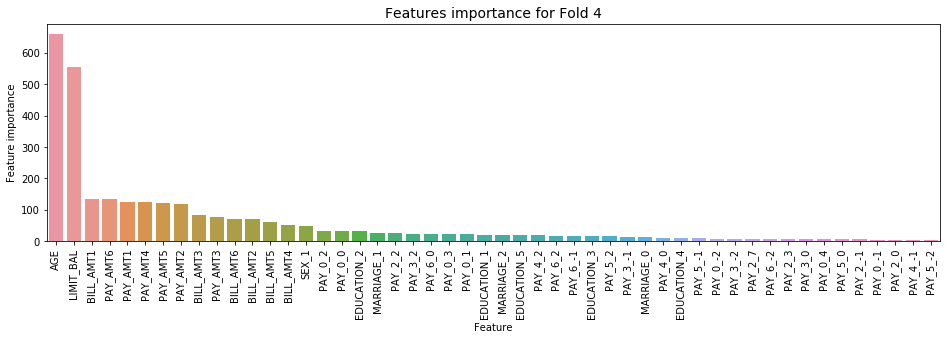

In [42]:
for idx,estimator in enumerate(scoresLR['estimator']):
    tmp = pd.DataFrame({'Feature': X.columns, 'Feature importance': estimator[1].feature_importances_})
    tmp = tmp.sort_values(by='Feature importance',ascending=False)
    plt.figure(figsize = (16,4))
    plt.title('Features importance for Fold {}'.format(idx+1),fontsize=14)
    s = sns.barplot(x='Feature',y='Feature importance',data=tmp.iloc[:50,:])
    s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.show()
    

For the Lightbgm with SMOTE, the most important features are **AGE, LIMIT_BAL, PAY_AMT6.**

# 5. Results summary
The table below sum up all 16 classification models we've run in the Appendix:

In [43]:
final_results=pd.DataFrame()
final_results['Logistic']=log
final_results['Logistic-SMOTE']=log_smote
final_results['SVC']=svc
final_results['SVC-SMOTE']=svc_smote
final_results['Random Forest']=rf
final_results['Random Forest-SMOTE']=rf_smote
final_results['Gradient Boostin']=gdb
final_results['Gradient Boostin-SMOTE']=gdb_smote
final_results['AdaBoost']=adb
final_results['AdaBoost(SMOTE)']=adb_smote
final_results['XGBoost']=xgb
final_results['XGBoost(SMOTE)']=xgb_smote
final_results['CATBoost']=cat
final_results['CATBoost(SMOTE)']=cat_smote
final_results['LightBGM']=lbgm
final_results['LightBGM(SMOTE)']=lbgm_smote
final_results=final_results.transpose()
display(final_results.sort_values('test_f1'))

,fit_time,test_accuracy,test_precision,test_recall,test_f1,test_roc_auc
Random Forest,1.808559,0.816467,0.660438,0.350519,0.457970,0.763201
LightBGM,1.242070,0.819800,0.666250,0.371623,0.477109,0.780193
CATBoost(SMOTE),16.013066,0.816300,0.636659,0.395449,0.487793,0.773896
LightBGM(SMOTE),6.380199,0.811667,0.605145,0.429502,0.502218,0.774157
Random Forest-SMOTE,6.683723,0.794767,0.540852,0.478971,0.507954,0.756740
AdaBoost(SMOTE),7.874560,0.769933,0.483708,0.548871,0.513543,0.753329
XGBoost(SMOTE),10.683387,0.797633,0.546138,0.506541,0.525485,0.769194
Gradient Boostin-SMOTE,21.968881,0.796500,0.542712,0.510847,0.526154,0.768246
SVC-SMOTE,197.889812,0.778567,0.499863,0.563015,0.529442,0.758784
Logistic-SMOTE,4.561268,0.769900,0.483562,0.585925,0.529756,0.767745


As we can see from the tables, the results are quite vary between classifiers. The best ones in term of accuracy and precision belongs to Random Forest, Light BGM,  CATBoost(SMOTE), LightBGM(SMOTE) while AdaBoost, Gradient Boostin, CATBoost places the last.This is supprisingly the contrary for F1 score and Recall while Roc-auc ratios don't vary much between these 16 algorithms.

As this data is imbalanced the acurracy is not a good tool to access performance, eventhough we applied the class-weight, SMOTE for training dataset. We just take into consideration this accuracy betwen these 2 data processing method. We can see that eventhough accuracy is higher for some algorithms, the F1 scores return the lowest. 

Although precision can be used with imbalanced data, the precision in this case have very similar ranking compare to accuracy. However, we notice that the Recall rank the highest precision the last. This demonstrade that even though the model predict low false positive but high false negative and vice versa. Appearantly, there is trade off between Precision and Recall. Therefore, our priority will be the F1 Score to measure performance. As it is the weighted average between Precision and Recall, the highest F1 score, the optimal for both false positive and false negative.
Overall, the XGBoost, CATBoost and Gradient Boosting have the highest F1 score, which is the favorable choices for credit scoring. They also have the highest scores of ROC AUC
For the data processing, there appear differences between class-weight method and SMOTE for data processing using Random Forest and CATBoost. For Random Forest, we should use SMOTE while for CATBoost, it 's better to use class-weight method.

In [44]:
display(final_results.sort_values('fit_time'))

,fit_time,test_accuracy,test_precision,test_recall,test_f1,test_roc_auc
Logistic,0.575497,0.775567,0.493912,0.577663,0.532429,0.768397
LightBGM,1.242070,0.819800,0.666250,0.371623,0.477109,0.780193
Random Forest,1.808559,0.816467,0.660438,0.350519,0.457970,0.763201
AdaBoost,2.406977,0.758233,0.465499,0.619416,0.531326,0.774812
XGBoost,4.323477,0.805633,0.567964,0.509331,0.536886,0.781353
Logistic-SMOTE,4.561268,0.769900,0.483562,0.585925,0.529756,0.767745
LightBGM(SMOTE),6.380199,0.811667,0.605145,0.429502,0.502218,0.774157
Random Forest-SMOTE,6.683723,0.794767,0.540852,0.478971,0.507954,0.756740
AdaBoost(SMOTE),7.874560,0.769933,0.483708,0.548871,0.513543,0.753329
Gradient Boostin,10.220709,0.759967,0.468915,0.637003,0.540051,0.781414


Also regarding the fitting speed of the model, we can see that the speed of support vector machine with SMOTE take up to more than 6 minutes. This phenomenon can be explain as from the documents about the complexity of sklearn.svm.SVC, it said: "The fit time complexity is more than quadratic with the number of samples which makes it hard to scale to dataset with more than a couple of 10000 samples." It is also suggested that the linearSVC can be a more effective replacement for the SVC. The fastest model in this case as expected is the logistic regression model as it is also one of the less complex models in machine learning. For the remaining methods, LightBGM is the fastest and this explains why the model is favored in Kaggle for intial explorating.



**Feature importance**
Other than model performance, ranking the feature is vital for a credit scoring model. We show below the variables which have highest predictive power: credit balance (LIMIT_BAL), age of borrowers (AGE), the repayment status in August (PAY_0_2) and bill statment in September (BILL_AMT1).

In [45]:
final_features=pd.DataFrame()
final_features['Random Forest']=['LIMIT_BAL', 'AGE', 'BILL_AMT1']
final_features['Random Forest-SMOTE']=['LIMIT_BAL', 'AGE', 'BILL_AMT1']
final_features['Gradient Boosting']=['PAY_0_2','PAY_2_2','PAY_3_2']
final_features['Gradient Boostin-SMOTE']=['PAY_0_2','LIMIT_BAL','PAY_2_2']
final_features['AdaBoost']=['BILL_AMT1','PAY_AMT1','LIMIT_BAL']
final_features['AdaBoost(SMOTE)']=['LIMIT_BAL','SEX_2','EDUCATION_2']
final_features['XGBoost']=['PAY_0_2','PAY_2_2','PAY_3_2']
final_features['XGBoost(SMOTE)']=['PAY_0_2','PAY_3_2','MARRIAGE_2']
final_features['CATBoost']=['BILL_AMT1','PAY_0_2','LIMIT_BAL']
final_features['CATBoost(SMOTE)']=['AGE','LIMIT_BAL','SEX_2']
final_features['LightBGM']=['BILL_AMT1','LIMIT_BAL','PAY_AMT6']
final_features['LightBGM(SMOTE)']=['AGE','LIMIT_BAL','PAY_AMT6']
final_features=final_features.transpose()
display(final_features)


,0,1,2
Random Forest,LIMIT_BAL,AGE,BILL_AMT1
Random Forest-SMOTE,LIMIT_BAL,AGE,BILL_AMT1
Gradient Boosting,PAY_0_2,PAY_2_2,PAY_3_2
Gradient Boostin-SMOTE,PAY_0_2,LIMIT_BAL,PAY_2_2
AdaBoost,BILL_AMT1,PAY_AMT1,LIMIT_BAL
AdaBoost(SMOTE),LIMIT_BAL,SEX_2,EDUCATION_2
XGBoost,PAY_0_2,PAY_2_2,PAY_3_2
XGBoost(SMOTE),PAY_0_2,PAY_3_2,MARRIAGE_2
CATBoost,BILL_AMT1,PAY_0_2,LIMIT_BAL
CATBoost(SMOTE),AGE,LIMIT_BAL,SEX_2


# 6. Conclusion

Our conclusion is that, to process the data in this case, with most of the algorithms, it is prefered to use class-weight mehod over SMOTE to adjust the imbalanced data. Among the 8 most popular algorithms, the XGBoost, CATBoost and Gradient Boosting seem to be the optimal choice in term of F1 score, ROC AUC and optimal for Precision and Recall.

For feature ranking, we confirm that the credit balance, age, repayment status in August and bill statement in September are the most predictive variables.

Due to limiation of time and scope of our study, we only use the defaul parameters for all of the models. We remark that these parametric algorithms can be optimized for better predictive power with the use of grid searching. Also, the F1 score for performance accessment is also a specific case of F_beta, in which the beta can be adjusted depending on our favorable of Precision or Recall.

### Reference


[1] Default Credit Card Clients Dataset, http://archive.ics.uci.edu/ml/machine-learning-databases <br>
[2] Principal Component Analysis, Wikipedia Page, https://en.wikipedia.org/wiki/Principal_component_analysis <br>
[3] RandomForrestClassifier, http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html <br>
[4] ROC-AUC characteristic, https://en.wikipedia.org/wiki/Receiver_operating_characteristic#Area_under_the_curve <br>
[5] AdaBoostClassifier, http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html <br>
[6] CatBoostClassifier, https://tech.yandex.com/catboost/doc/dg/concepts/python-reference_catboostclassifier-docpage/ <br>
[7] XGBoost Python API Reference, http://xgboost.readthedocs.io/en/latest/python/python_api.html <br>
[8] LightGBM Python implementation, https://github.com/Microsoft/LightGBM/tree/master/python-package <br>
[9] LightGBM algorithm, https://www.microsoft.com/en-us/research/wp-content/uploads/2017/11/lightgbm.pdf <br>